In [2]:
import numpy as np

import scipy as sc
import scipy.io as scio # for loading .mat file
from scipy import linalg
from scipy.spatial import KDTree

from sklearn.decomposition import PCA as PCAdimReduc
from sklearn.feature_extraction import DictVectorizer

import networkx as nx

import pygmtools as pygm

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

import cv2

import shapely

import svgpathtools
import drawsvg as draw

from bplustree import BPlusTree
from bplustree.serializer import Serializer
from bplustree.node import Node

import pickle

from xml.dom import minidom

import functools
from itertools import product, combinations
from typing import Optional, Tuple, List
from collections import Counter, defaultdict

import struct

import os, errno
import sys

import random

pygm.BACKEND = 'numpy' # set numpy as backend for pygmtools

# TOPOLOGY GRAPH / GEOMETRY EXTRACTION

In [3]:
from src.svg import *
from src.extraction import *
from src.database import *
from src.matching import *

{'attrib': {'fill': 'none', 'stroke': 'black', 'stroke-linecap': 'round', 'stroke-linejoin': 'round', 'stroke-width': '1.3537', 'transform': 'translate(87.52,138.4919) scale(2.2162) translate(-180,-104)'}, 'paths': [Path(CubicBezier(start=(325+193j), control1=(325+193j), control2=(319.8642+192.034j), end=(316+193j)),
     CubicBezier(start=(316+193j), control1=(310.7404+194.3149j), control2=(309.5617+194.6053j), end=(305+198j)),
     CubicBezier(start=(305+198j), control1=(288.8575+210.013j), control2=(287.8161+211.4186j), end=(273+225j)),
     CubicBezier(start=(273+225j), control1=(270.5198+227.2735j), control2=(269.9805+228.0586j), end=(269+231j)),
     CubicBezier(start=(269+231j), control1=(267.7521+234.7436j), control2=(266.8215+237.4286j), end=(268+240j)),
     CubicBezier(start=(268+240j), control1=(270.8285+246.1713j), control2=(273.7215+249.0355j), end=(280+255j)),
     CubicBezier(start=(280+255j), control1=(282.8223+257.6812j), control2=(284.1572+258.4178j), end=(288+259j))

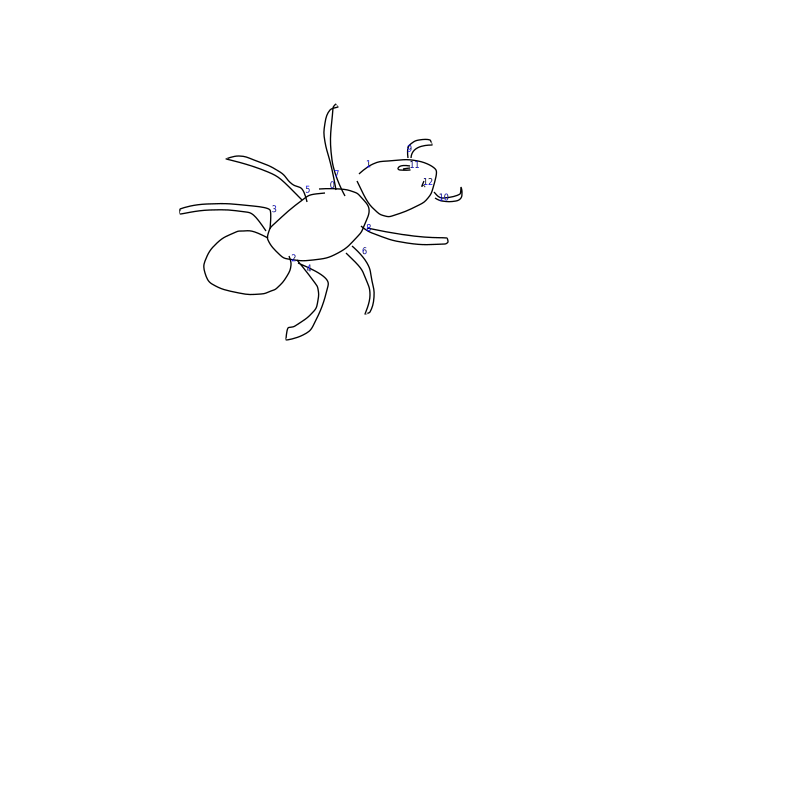

In [6]:
svg = load('assets/svg/ant/269.svg')
print(svg)
display(svg)

In [8]:
line_strings = get_line_strings(map(to_control_points, svg['paths']), step=10)

LINESTRING (320 190, 320 190, 310 190, 310 190, 310 190, 310 190, 300 190, 300 190, 300 190, 280 210, 280 210, 270 220, 270 220, 270 220, 260 220, 260 230, 260 230, 260 230, 260 230, 260 240, 260 240, 270 240, 270 240, 280 250, 280 250, 280 250, 280 250, 280 250, 280 250, 290 260, 300 260, 310 260, 310 260, 320 250, 320 250, 330 250, 330 250, 340 240, 340 240, 350 230, 350 230, 360 230, 360 230, 360 220, 360 220, 360 210, 360 210, 360 200, 360 200, 360 200, 360 200, 360 190, 360 190, 350 190, 350 190, 350 190, 350 190, 340 180, 340 180, 340 180, 340 180, 320 180, 310 180, 310 180)
<class 'shapely.geometry.linestring.LineString'>
307.27922061357856
14.142135623730951


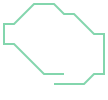

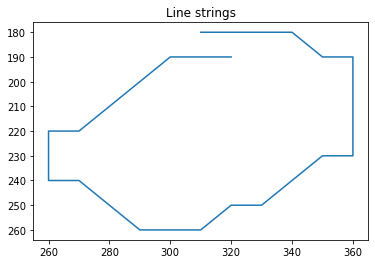

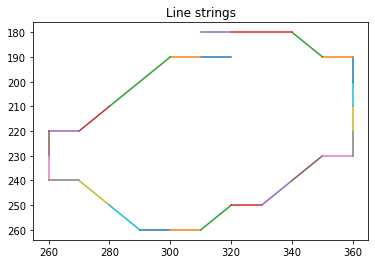

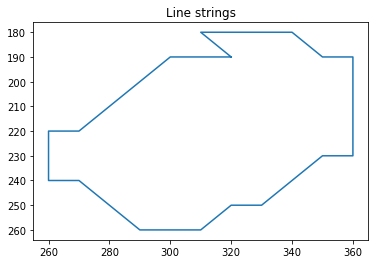

In [10]:
index = 0
ls = line_strings[index]

print(ls)
print(type(ls))
print(ls.length)

s, t = get_endpoints(ls)
print(s.distance(t))

plot_line_strings([ls])

segments = get_segments(ls)

# Plot segmented line string
plot_line_strings(segments)

# Plot closed line string
plot_line_strings([detect_approximate_polygon(ls)])

ls

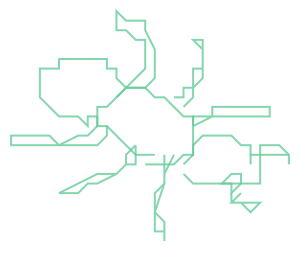

In [11]:
DEBUG = shapely.MultiLineString(line_strings)
DEBUG

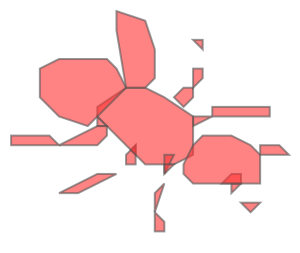

In [12]:
polygons = get_polygons(line_strings)

shapely.MultiPolygon(polygons)

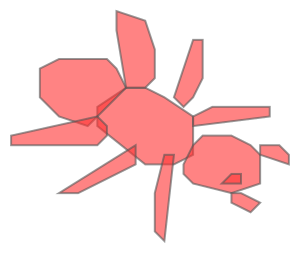

In [13]:
hulls = get_hulls(line_strings)

s = shapely.MultiPolygon(hulls)
s

### EXTRACTION

In [ ]:
svg = load('assets/svg/ant/279.svg')
display(svg)

In [ ]:
G = extract_graph(svg, 'ant')
plot_graph(G)

# DATABASE

## Offline graph extraction

In [24]:
IMAGE_DIRECTORY = os.sep.join(['assets', 'svg'])

def load_svg_files(ext='svg'):
    """
    Returns an iterator that yields the image file paths and their labels.
    """    
    def get_label(path):
        return path.split(os.sep)[-1]
    
    files = []
    
    for r, _, f in os.walk(IMAGE_DIRECTORY):
        for file in f:
            if file.endswith(f'.{ext}'):
                label = get_label(r)
                file_path = os.path.join(r, file)
                
                files.append((file_path, label))
                
    return files


def load_svg_images(files):
    """
    Returns an iterator that yields the image data and their labels.
    """
    for f, l in files:
        print(f)
        yield load(f), l

def extract_graphs(images):
    """
    Extract all graphs from given images.
    """
    i = 0
    graphs = []
    for img, l in images:
        cp = map(to_control_points,img['paths'])
        graphs.append(extract_graph(cp, l))
        print(i)
        i += 1
    return graphs

In [25]:
# Extract graphs for each sketch in the dataset, offline processing step

paths = load_svg_files()
print(len(paths))

images = load_svg_images(paths)

graphs = extract_graphs(images)
print(len(graphs))

20000
assets\svg\airplane\1.svg
0
assets\svg\airplane\10.svg
1
assets\svg\airplane\11.svg
2
assets\svg\airplane\12.svg
3
assets\svg\airplane\13.svg
4
assets\svg\airplane\14.svg
5
assets\svg\airplane\15.svg
6
assets\svg\airplane\16.svg
7
assets\svg\airplane\17.svg
8
assets\svg\airplane\18.svg
9
assets\svg\airplane\19.svg
10
assets\svg\airplane\2.svg
11
assets\svg\airplane\20.svg
12
assets\svg\airplane\21.svg
13
assets\svg\airplane\22.svg
14
assets\svg\airplane\23.svg
15
assets\svg\airplane\24.svg
16
assets\svg\airplane\25.svg
17
assets\svg\airplane\26.svg
18
assets\svg\airplane\27.svg
19
assets\svg\airplane\28.svg
20
assets\svg\airplane\29.svg
21
assets\svg\airplane\3.svg
22
assets\svg\airplane\30.svg
23
assets\svg\airplane\31.svg
24
assets\svg\airplane\32.svg
25
assets\svg\airplane\33.svg
26
assets\svg\airplane\34.svg
27
assets\svg\airplane\35.svg
28
assets\svg\airplane\36.svg
29
assets\svg\airplane\37.svg
30
assets\svg\airplane\38.svg
31
assets\svg\airplane\39.svg
32
assets\svg\airpla

273
assets\svg\ant\275.svg
274
assets\svg\ant\276.svg
275
assets\svg\ant\277.svg
276
assets\svg\ant\278.svg
277
assets\svg\ant\279.svg
278
assets\svg\ant\280.svg
279
assets\svg\ant\281.svg
280
assets\svg\ant\282.svg
281
assets\svg\ant\283.svg
282
assets\svg\ant\284.svg
283
assets\svg\ant\285.svg
284
assets\svg\ant\286.svg
285
assets\svg\ant\287.svg
286
assets\svg\ant\288.svg
287
assets\svg\ant\289.svg
288
assets\svg\ant\290.svg
289
assets\svg\ant\291.svg
290
assets\svg\ant\292.svg
291
assets\svg\ant\293.svg
292
assets\svg\ant\294.svg
293
assets\svg\ant\295.svg
294
assets\svg\ant\296.svg
295
assets\svg\ant\297.svg
296
assets\svg\ant\298.svg
297
assets\svg\ant\299.svg
298
assets\svg\ant\300.svg
299
assets\svg\ant\301.svg
300
assets\svg\ant\302.svg
301
assets\svg\ant\303.svg
302
assets\svg\ant\304.svg
303
assets\svg\ant\305.svg
304
assets\svg\ant\306.svg
305
assets\svg\ant\307.svg
306
assets\svg\ant\308.svg
307
assets\svg\ant\309.svg
308
assets\svg\ant\310.svg
309
assets\svg\ant\311.svg
3

565
assets\svg\ashtray\567.svg
566
assets\svg\ashtray\568.svg
567
assets\svg\ashtray\569.svg
568
assets\svg\ashtray\570.svg
569
assets\svg\ashtray\571.svg
570
assets\svg\ashtray\572.svg
571
assets\svg\ashtray\573.svg
572
assets\svg\ashtray\574.svg
573
assets\svg\ashtray\575.svg
574
assets\svg\ashtray\576.svg
575
assets\svg\ashtray\577.svg
576
assets\svg\ashtray\578.svg
577
assets\svg\ashtray\579.svg
578
assets\svg\ashtray\580.svg
579
assets\svg\ashtray\581.svg
580
assets\svg\ashtray\582.svg
581
assets\svg\ashtray\583.svg
582
assets\svg\ashtray\584.svg
583
assets\svg\ashtray\585.svg
584
assets\svg\ashtray\586.svg
585
assets\svg\ashtray\587.svg
586
assets\svg\ashtray\588.svg
587
assets\svg\ashtray\589.svg
588
assets\svg\ashtray\590.svg
589
assets\svg\ashtray\591.svg
590
assets\svg\ashtray\592.svg
591
assets\svg\ashtray\593.svg
592
assets\svg\ashtray\594.svg
593
assets\svg\ashtray\595.svg
594
assets\svg\ashtray\596.svg
595
assets\svg\ashtray\597.svg
596
assets\svg\ashtray\598.svg
597
asse

844
assets\svg\banana\846.svg
845
assets\svg\banana\847.svg
846
assets\svg\banana\848.svg
847
assets\svg\banana\849.svg
848
assets\svg\banana\850.svg
849
assets\svg\banana\851.svg
850
assets\svg\banana\852.svg
851
assets\svg\banana\853.svg
852
assets\svg\banana\854.svg
853
assets\svg\banana\855.svg
854
assets\svg\banana\856.svg
855
assets\svg\banana\857.svg
856
assets\svg\banana\858.svg
857
assets\svg\banana\859.svg
858
assets\svg\banana\860.svg
859
assets\svg\banana\861.svg
860
assets\svg\banana\862.svg
861
assets\svg\banana\863.svg
862
assets\svg\banana\864.svg
863
assets\svg\banana\865.svg
864
assets\svg\banana\866.svg
865
assets\svg\banana\867.svg
866
assets\svg\banana\868.svg
867
assets\svg\banana\869.svg
868
assets\svg\banana\870.svg
869
assets\svg\banana\871.svg
870
assets\svg\banana\872.svg
871
assets\svg\banana\873.svg
872
assets\svg\banana\874.svg
873
assets\svg\banana\875.svg
874
assets\svg\banana\876.svg
875
assets\svg\banana\877.svg
876
assets\svg\banana\878.svg
877
assets

1100
assets\svg\basket\1102.svg
1101
assets\svg\basket\1103.svg
1102
assets\svg\basket\1104.svg
1103
assets\svg\basket\1105.svg
1104
assets\svg\basket\1106.svg
1105
assets\svg\basket\1107.svg
1106
assets\svg\basket\1108.svg
1107
assets\svg\basket\1109.svg
1108
assets\svg\basket\1110.svg
1109
assets\svg\basket\1111.svg
1110
assets\svg\basket\1112.svg
1111
assets\svg\basket\1113.svg
1112
assets\svg\basket\1114.svg
1113
assets\svg\basket\1115.svg
1114
assets\svg\basket\1116.svg
1115
assets\svg\basket\1117.svg
1116
assets\svg\basket\1118.svg
1117
assets\svg\basket\1119.svg
1118
assets\svg\basket\1120.svg
1119
assets\svg\bathtub\1121.svg
1120
assets\svg\bathtub\1122.svg
1121
assets\svg\bathtub\1123.svg
1122
assets\svg\bathtub\1124.svg
1123
assets\svg\bathtub\1125.svg
1124
assets\svg\bathtub\1126.svg
1125
assets\svg\bathtub\1127.svg
1126
assets\svg\bathtub\1128.svg
1127
assets\svg\bathtub\1129.svg
1128
assets\svg\bathtub\1130.svg
1129
assets\svg\bathtub\1131.svg
1130
assets\svg\bathtub\1132.

1347
assets\svg\bed\1349.svg
1348
assets\svg\bed\1350.svg
1349
assets\svg\bed\1351.svg
1350
assets\svg\bed\1352.svg
1351
assets\svg\bed\1353.svg
1352
assets\svg\bed\1354.svg
1353
assets\svg\bed\1355.svg
1354
assets\svg\bed\1356.svg
1355
assets\svg\bed\1357.svg
1356
assets\svg\bed\1358.svg
1357
assets\svg\bed\1359.svg
1358
assets\svg\bed\1360.svg
1359
assets\svg\bee\1361.svg
1360
assets\svg\bee\1362.svg
1361
assets\svg\bee\1363.svg
1362
assets\svg\bee\1364.svg
1363
assets\svg\bee\1365.svg
1364
assets\svg\bee\1366.svg
1365
assets\svg\bee\1367.svg
1366
assets\svg\bee\1368.svg
1367
assets\svg\bee\1369.svg
1368
assets\svg\bee\1370.svg
1369
assets\svg\bee\1371.svg
1370
assets\svg\bee\1372.svg
1371
assets\svg\bee\1373.svg
1372
assets\svg\bee\1374.svg
1373
assets\svg\bee\1375.svg
1374
assets\svg\bee\1376.svg
1375
assets\svg\bee\1377.svg
1376
assets\svg\bee\1378.svg
1377
assets\svg\bee\1379.svg
1378
assets\svg\bee\1380.svg
1379
assets\svg\bee\1381.svg
1380
assets\svg\bee\1382.svg
1381
assets\sv

1614
assets\svg\bench\1616.svg
1615
assets\svg\bench\1617.svg
1616
assets\svg\bench\1618.svg
1617
assets\svg\bench\1619.svg
1618
assets\svg\bench\1620.svg
1619
assets\svg\bench\1621.svg
1620
assets\svg\bench\1622.svg
1621
assets\svg\bench\1623.svg
1622
assets\svg\bench\1624.svg
1623
assets\svg\bench\1625.svg
1624
assets\svg\bench\1626.svg
1625
assets\svg\bench\1627.svg
1626
assets\svg\bench\1628.svg
1627
assets\svg\bench\1629.svg
1628
assets\svg\bench\1630.svg
1629
assets\svg\bench\1631.svg
1630
assets\svg\bench\1632.svg
1631
assets\svg\bench\1633.svg
1632
assets\svg\bench\1634.svg
1633
assets\svg\bench\1635.svg
1634
assets\svg\bench\1636.svg
1635
assets\svg\bench\1637.svg
1636
assets\svg\bench\1638.svg
1637
assets\svg\bench\1639.svg
1638
assets\svg\bench\1640.svg
1639
assets\svg\bench\1641.svg
1640
assets\svg\bench\1642.svg
1641
assets\svg\bench\1643.svg
1642
assets\svg\bench\1644.svg
1643
assets\svg\bench\1645.svg
1644
assets\svg\bench\1646.svg
1645
assets\svg\bench\1647.svg
1646
ass

1862
assets\svg\blimp\1864.svg
1863
assets\svg\blimp\1865.svg
1864
assets\svg\blimp\1866.svg
1865
assets\svg\blimp\1867.svg
1866
assets\svg\blimp\1868.svg
1867
assets\svg\blimp\1869.svg
1868
assets\svg\blimp\1870.svg
1869
assets\svg\blimp\1871.svg
1870
assets\svg\blimp\1872.svg
1871
assets\svg\blimp\1873.svg
1872
assets\svg\blimp\1874.svg
1873
assets\svg\blimp\1875.svg
1874
assets\svg\blimp\1876.svg
1875
assets\svg\blimp\1877.svg
1876
assets\svg\blimp\1878.svg
1877
assets\svg\blimp\1879.svg
1878
assets\svg\blimp\1880.svg
1879
assets\svg\blimp\1881.svg
1880
assets\svg\blimp\1882.svg
1881
assets\svg\blimp\1883.svg
1882
assets\svg\blimp\1884.svg
1883
assets\svg\blimp\1885.svg
1884
assets\svg\blimp\1886.svg
1885
assets\svg\blimp\1887.svg
1886
assets\svg\blimp\1888.svg
1887
assets\svg\blimp\1889.svg
1888
assets\svg\blimp\1890.svg
1889
assets\svg\blimp\1891.svg
1890
assets\svg\blimp\1892.svg
1891
assets\svg\blimp\1893.svg
1892
assets\svg\blimp\1894.svg
1893
assets\svg\blimp\1895.svg
1894
ass

2125
assets\svg\boomerang\2127.svg
2126
assets\svg\boomerang\2128.svg
2127
assets\svg\boomerang\2129.svg
2128
assets\svg\boomerang\2130.svg
2129
assets\svg\boomerang\2131.svg
2130
assets\svg\boomerang\2132.svg
2131
assets\svg\boomerang\2133.svg
2132
assets\svg\boomerang\2134.svg
2133
assets\svg\boomerang\2135.svg
2134
assets\svg\boomerang\2136.svg
2135
assets\svg\boomerang\2137.svg
2136
assets\svg\boomerang\2138.svg
2137
assets\svg\boomerang\2139.svg
2138
assets\svg\boomerang\2140.svg
2139
assets\svg\boomerang\2141.svg
2140
assets\svg\boomerang\2142.svg
2141
assets\svg\boomerang\2143.svg
2142
assets\svg\boomerang\2144.svg
2143
assets\svg\boomerang\2145.svg
2144
assets\svg\boomerang\2146.svg
2145
assets\svg\boomerang\2147.svg
2146
assets\svg\boomerang\2148.svg
2147
assets\svg\boomerang\2149.svg
2148
assets\svg\boomerang\2150.svg
2149
assets\svg\boomerang\2151.svg
2150
assets\svg\boomerang\2152.svg
2151
assets\svg\boomerang\2153.svg
2152
assets\svg\boomerang\2154.svg
2153
assets\svg\boom

2370
assets\svg\brain\2372.svg
2371
assets\svg\brain\2373.svg
2372
assets\svg\brain\2374.svg
2373
assets\svg\brain\2375.svg
2374
assets\svg\brain\2376.svg
2375
assets\svg\brain\2377.svg
2376
assets\svg\brain\2378.svg
2377
assets\svg\brain\2379.svg
2378
assets\svg\brain\2380.svg
2379
assets\svg\brain\2381.svg
2380
assets\svg\brain\2382.svg
2381
assets\svg\brain\2383.svg
2382
assets\svg\brain\2384.svg
2383
assets\svg\brain\2385.svg
2384
assets\svg\brain\2386.svg
2385
assets\svg\brain\2387.svg
2386
assets\svg\brain\2388.svg
2387
assets\svg\brain\2389.svg
2388
assets\svg\brain\2390.svg
2389
assets\svg\brain\2391.svg
2390
assets\svg\brain\2392.svg
2391
assets\svg\brain\2393.svg
2392
assets\svg\brain\2394.svg
2393
assets\svg\brain\2395.svg
2394
assets\svg\brain\2396.svg
2395
assets\svg\brain\2397.svg
2396
assets\svg\brain\2398.svg
2397
assets\svg\brain\2399.svg
2398
assets\svg\brain\2400.svg
2399
assets\svg\bread\2401.svg
2400
assets\svg\bread\2402.svg
2401
assets\svg\bread\2403.svg
2402
ass

2625
assets\svg\bulldozer\2627.svg
2626
assets\svg\bulldozer\2628.svg
2627
assets\svg\bulldozer\2629.svg
2628
assets\svg\bulldozer\2630.svg
2629
assets\svg\bulldozer\2631.svg
2630
assets\svg\bulldozer\2632.svg
2631
assets\svg\bulldozer\2633.svg
2632
assets\svg\bulldozer\2634.svg
2633
assets\svg\bulldozer\2635.svg
2634
assets\svg\bulldozer\2636.svg
2635
assets\svg\bulldozer\2637.svg
2636
assets\svg\bulldozer\2638.svg
2637
assets\svg\bulldozer\2639.svg
2638
assets\svg\bulldozer\2640.svg
2639
assets\svg\bus\2641.svg
2640
assets\svg\bus\2642.svg
2641
assets\svg\bus\2643.svg
2642
assets\svg\bus\2644.svg
2643
assets\svg\bus\2645.svg
2644
assets\svg\bus\2646.svg
2645
assets\svg\bus\2647.svg
2646
assets\svg\bus\2648.svg
2647
assets\svg\bus\2649.svg
2648
assets\svg\bus\2650.svg
2649
assets\svg\bus\2651.svg
2650
assets\svg\bus\2652.svg
2651
assets\svg\bus\2653.svg
2652
assets\svg\bus\2654.svg
2653
assets\svg\bus\2655.svg
2654
assets\svg\bus\2656.svg
2655
assets\svg\bus\2657.svg
2656
assets\svg\b

2887
assets\svg\cabinet\2889.svg
2888
assets\svg\cabinet\2890.svg
2889
assets\svg\cabinet\2891.svg
2890
assets\svg\cabinet\2892.svg
2891
assets\svg\cabinet\2893.svg
2892
assets\svg\cabinet\2894.svg
2893
assets\svg\cabinet\2895.svg
2894
assets\svg\cabinet\2896.svg
2895
assets\svg\cabinet\2897.svg
2896
assets\svg\cabinet\2898.svg
2897
assets\svg\cabinet\2899.svg
2898
assets\svg\cabinet\2900.svg
2899
assets\svg\cabinet\2901.svg
2900
assets\svg\cabinet\2902.svg
2901
assets\svg\cabinet\2903.svg
2902
assets\svg\cabinet\2904.svg
2903
assets\svg\cabinet\2905.svg
2904
assets\svg\cabinet\2906.svg
2905
assets\svg\cabinet\2907.svg
2906
assets\svg\cabinet\2908.svg
2907
assets\svg\cabinet\2909.svg
2908
assets\svg\cabinet\2910.svg
2909
assets\svg\cabinet\2911.svg
2910
assets\svg\cabinet\2912.svg
2911
assets\svg\cabinet\2913.svg
2912
assets\svg\cabinet\2914.svg
2913
assets\svg\cabinet\2915.svg
2914
assets\svg\cabinet\2916.svg
2915
assets\svg\cabinet\2917.svg
2916
assets\svg\cabinet\2918.svg
2917
asset

3143
assets\svg\calculator\3145.svg
3144
assets\svg\calculator\3146.svg
3145
assets\svg\calculator\3147.svg
3146
assets\svg\calculator\3148.svg
3147
assets\svg\calculator\3149.svg
3148
assets\svg\calculator\3150.svg
3149
assets\svg\calculator\3151.svg
3150
assets\svg\calculator\3152.svg
3151
assets\svg\calculator\3153.svg
3152
assets\svg\calculator\3154.svg
3153
assets\svg\calculator\3155.svg
3154
assets\svg\calculator\3156.svg
3155
assets\svg\calculator\3157.svg
3156
assets\svg\calculator\3158.svg
3157
assets\svg\calculator\3159.svg
3158
assets\svg\calculator\3160.svg
3159
assets\svg\calculator\3161.svg
3160
assets\svg\calculator\3162.svg
3161
assets\svg\calculator\3163.svg
3162
assets\svg\calculator\3164.svg
3163
assets\svg\calculator\3165.svg
3164
assets\svg\calculator\3166.svg
3165
assets\svg\calculator\3167.svg
3166
assets\svg\calculator\3168.svg
3167
assets\svg\calculator\3169.svg
3168
assets\svg\calculator\3170.svg
3169
assets\svg\calculator\3171.svg
3170
assets\svg\calculator\3

3397
assets\svg\candle\3399.svg
3398
assets\svg\candle\3400.svg
3399
assets\svg\candle\3401.svg
3400
assets\svg\candle\3402.svg
3401
assets\svg\candle\3403.svg
3402
assets\svg\candle\3404.svg
3403
assets\svg\candle\3405.svg
3404
assets\svg\candle\3406.svg
3405
assets\svg\candle\3407.svg
3406
assets\svg\candle\3408.svg
3407
assets\svg\candle\3409.svg
3408
assets\svg\candle\3410.svg
3409
assets\svg\candle\3411.svg
3410
assets\svg\candle\3412.svg
3411
assets\svg\candle\3413.svg
3412
assets\svg\candle\3414.svg
3413
assets\svg\candle\3415.svg
3414
assets\svg\candle\3416.svg
3415
assets\svg\candle\3417.svg
3416
assets\svg\candle\3418.svg
3417
assets\svg\candle\3419.svg
3418
assets\svg\candle\3420.svg
3419
assets\svg\candle\3421.svg
3420
assets\svg\candle\3422.svg
3421
assets\svg\candle\3423.svg
3422
assets\svg\candle\3424.svg
3423
assets\svg\candle\3425.svg
3424
assets\svg\candle\3426.svg
3425
assets\svg\candle\3427.svg
3426
assets\svg\candle\3428.svg
3427
assets\svg\candle\3429.svg
3428
ass

3649
assets\svg\car (sedan)\3651.svg
3650
assets\svg\car (sedan)\3652.svg
3651
assets\svg\car (sedan)\3653.svg
3652
assets\svg\car (sedan)\3654.svg
3653
assets\svg\car (sedan)\3655.svg
3654
assets\svg\car (sedan)\3656.svg
3655
assets\svg\car (sedan)\3657.svg
3656
assets\svg\car (sedan)\3658.svg
3657
assets\svg\car (sedan)\3659.svg
3658
assets\svg\car (sedan)\3660.svg
3659
assets\svg\car (sedan)\3661.svg
3660
assets\svg\car (sedan)\3662.svg
3661
assets\svg\car (sedan)\3663.svg
3662
assets\svg\car (sedan)\3664.svg
3663
assets\svg\car (sedan)\3665.svg
3664
assets\svg\car (sedan)\3666.svg
3665
assets\svg\car (sedan)\3667.svg
3666
assets\svg\car (sedan)\3668.svg
3667
assets\svg\car (sedan)\3669.svg
3668
assets\svg\car (sedan)\3670.svg
3669
assets\svg\car (sedan)\3671.svg
3670
assets\svg\car (sedan)\3672.svg
3671
assets\svg\car (sedan)\3673.svg
3672
assets\svg\car (sedan)\3674.svg
3673
assets\svg\car (sedan)\3675.svg
3674
assets\svg\car (sedan)\3676.svg
3675
assets\svg\car (sedan)\3677.svg
3

3909
assets\svg\cat\3911.svg
3910
assets\svg\cat\3912.svg
3911
assets\svg\cat\3913.svg
3912
assets\svg\cat\3914.svg
3913
assets\svg\cat\3915.svg
3914
assets\svg\cat\3916.svg
3915
assets\svg\cat\3917.svg
3916
assets\svg\cat\3918.svg
3917
assets\svg\cat\3919.svg
3918
assets\svg\cat\3920.svg
3919
assets\svg\cell phone\3921.svg
3920
assets\svg\cell phone\3922.svg
3921
assets\svg\cell phone\3923.svg
3922
assets\svg\cell phone\3924.svg
3923
assets\svg\cell phone\3925.svg
3924
assets\svg\cell phone\3926.svg
3925
assets\svg\cell phone\3927.svg
3926
assets\svg\cell phone\3928.svg
3927
assets\svg\cell phone\3929.svg
3928
assets\svg\cell phone\3930.svg
3929
assets\svg\cell phone\3931.svg
3930
assets\svg\cell phone\3932.svg
3931
assets\svg\cell phone\3933.svg
3932
assets\svg\cell phone\3934.svg
3933
assets\svg\cell phone\3935.svg
3934
assets\svg\cell phone\3936.svg
3935
assets\svg\cell phone\3937.svg
3936
assets\svg\cell phone\3938.svg
3937
assets\svg\cell phone\3939.svg
3938
assets\svg\cell phone

4156
assets\svg\chandelier\4158.svg
4157
assets\svg\chandelier\4159.svg
4158
assets\svg\chandelier\4160.svg
4159
assets\svg\church\4161.svg
4160
assets\svg\church\4162.svg
4161
assets\svg\church\4163.svg
4162
assets\svg\church\4164.svg
4163
assets\svg\church\4165.svg
4164
assets\svg\church\4166.svg
4165
assets\svg\church\4167.svg
4166
assets\svg\church\4168.svg
4167
assets\svg\church\4169.svg
4168
assets\svg\church\4170.svg
4169
assets\svg\church\4171.svg
4170
assets\svg\church\4172.svg
4171
assets\svg\church\4173.svg
4172
assets\svg\church\4174.svg
4173
assets\svg\church\4175.svg
4174
assets\svg\church\4176.svg
4175
assets\svg\church\4177.svg
4176
assets\svg\church\4178.svg
4177
assets\svg\church\4179.svg
4178
assets\svg\church\4180.svg
4179
assets\svg\church\4181.svg
4180
assets\svg\church\4182.svg
4181
assets\svg\church\4183.svg
4182
assets\svg\church\4184.svg
4183
assets\svg\church\4185.svg
4184
assets\svg\church\4186.svg
4185
assets\svg\church\4187.svg
4186
assets\svg\church\4188.

4413
assets\svg\comb\4415.svg
4414
assets\svg\comb\4416.svg
4415
assets\svg\comb\4417.svg
4416
assets\svg\comb\4418.svg
4417
assets\svg\comb\4419.svg
4418
assets\svg\comb\4420.svg
4419
assets\svg\comb\4421.svg
4420
assets\svg\comb\4422.svg
4421
assets\svg\comb\4423.svg
4422
assets\svg\comb\4424.svg
4423
assets\svg\comb\4425.svg
4424
assets\svg\comb\4426.svg
4425
assets\svg\comb\4427.svg
4426
assets\svg\comb\4428.svg
4427
assets\svg\comb\4429.svg
4428
assets\svg\comb\4430.svg
4429
assets\svg\comb\4431.svg
4430
assets\svg\comb\4432.svg
4431
assets\svg\comb\4433.svg
4432
assets\svg\comb\4434.svg
4433
assets\svg\comb\4435.svg
4434
assets\svg\comb\4436.svg
4435
assets\svg\comb\4437.svg
4436
assets\svg\comb\4438.svg
4437
assets\svg\comb\4439.svg
4438
assets\svg\comb\4440.svg
4439
assets\svg\comb\4441.svg
4440
assets\svg\comb\4442.svg
4441
assets\svg\comb\4443.svg
4442
assets\svg\comb\4444.svg
4443
assets\svg\comb\4445.svg
4444
assets\svg\comb\4446.svg
4445
assets\svg\comb\4447.svg
4446
asset

4634
assets\svg\computer-mouse\4636.svg
4635
assets\svg\computer-mouse\4637.svg
4636
assets\svg\computer-mouse\4638.svg
4637
assets\svg\computer-mouse\4639.svg
4638
assets\svg\computer-mouse\4640.svg
4639
assets\svg\couch\4641.svg
4640
assets\svg\couch\4642.svg
4641
assets\svg\couch\4643.svg
4642
assets\svg\couch\4644.svg
4643
assets\svg\couch\4645.svg
4644
assets\svg\couch\4646.svg
4645
assets\svg\couch\4647.svg
4646
assets\svg\couch\4648.svg
4647
assets\svg\couch\4649.svg
4648
assets\svg\couch\4650.svg
4649
assets\svg\couch\4651.svg
4650
assets\svg\couch\4652.svg
4651
assets\svg\couch\4653.svg
4652
assets\svg\couch\4654.svg
4653
assets\svg\couch\4655.svg
4654
assets\svg\couch\4656.svg
4655
assets\svg\couch\4657.svg
4656
assets\svg\couch\4658.svg
4657
assets\svg\couch\4659.svg
4658
assets\svg\couch\4660.svg
4659
assets\svg\couch\4661.svg
4660
assets\svg\couch\4662.svg
4661
assets\svg\couch\4663.svg
4662
assets\svg\couch\4664.svg
4663
assets\svg\couch\4665.svg
4664
assets\svg\couch\466

4902
assets\svg\crane (machine)\4904.svg
4903
assets\svg\crane (machine)\4905.svg
4904
assets\svg\crane (machine)\4906.svg
4905
assets\svg\crane (machine)\4907.svg
4906
assets\svg\crane (machine)\4908.svg
4907
assets\svg\crane (machine)\4909.svg
4908
assets\svg\crane (machine)\4910.svg
4909
assets\svg\crane (machine)\4911.svg
4910
assets\svg\crane (machine)\4912.svg
4911
assets\svg\crane (machine)\4913.svg
4912
assets\svg\crane (machine)\4914.svg
4913
assets\svg\crane (machine)\4915.svg
4914
assets\svg\crane (machine)\4916.svg
4915
assets\svg\crane (machine)\4917.svg
4916
assets\svg\crane (machine)\4918.svg
4917
assets\svg\crane (machine)\4919.svg
4918
assets\svg\crane (machine)\4920.svg
4919
assets\svg\crane (machine)\4921.svg
4920
assets\svg\crane (machine)\4922.svg
4921
assets\svg\crane (machine)\4923.svg
4922
assets\svg\crane (machine)\4924.svg
4923
assets\svg\crane (machine)\4925.svg
4924
assets\svg\crane (machine)\4926.svg
4925
assets\svg\crane (machine)\4927.svg
4926
assets\svg\

5144
assets\svg\cup\5146.svg
5145
assets\svg\cup\5147.svg
5146
assets\svg\cup\5148.svg
5147
assets\svg\cup\5149.svg
5148
assets\svg\cup\5150.svg
5149
assets\svg\cup\5151.svg
5150
assets\svg\cup\5152.svg
5151
assets\svg\cup\5153.svg
5152
assets\svg\cup\5154.svg
5153
assets\svg\cup\5155.svg
5154
assets\svg\cup\5156.svg
5155
assets\svg\cup\5157.svg
5156
assets\svg\cup\5158.svg
5157
assets\svg\cup\5159.svg
5158
assets\svg\cup\5160.svg
5159
assets\svg\cup\5161.svg
5160
assets\svg\cup\5162.svg
5161
assets\svg\cup\5163.svg
5162
assets\svg\cup\5164.svg
5163
assets\svg\cup\5165.svg
5164
assets\svg\cup\5166.svg
5165
assets\svg\cup\5167.svg
5166
assets\svg\cup\5168.svg
5167
assets\svg\cup\5169.svg
5168
assets\svg\cup\5170.svg
5169
assets\svg\cup\5171.svg
5170
assets\svg\cup\5172.svg
5171
assets\svg\cup\5173.svg
5172
assets\svg\cup\5174.svg
5173
assets\svg\cup\5175.svg
5174
assets\svg\cup\5176.svg
5175
assets\svg\cup\5177.svg
5176
assets\svg\cup\5178.svg
5177
assets\svg\cup\5179.svg
5178
assets\sv

5417
assets\svg\dolphin\5419.svg
5418
assets\svg\dolphin\5420.svg
5419
assets\svg\dolphin\5421.svg
5420
assets\svg\dolphin\5422.svg
5421
assets\svg\dolphin\5423.svg
5422
assets\svg\dolphin\5424.svg
5423
assets\svg\dolphin\5425.svg
5424
assets\svg\dolphin\5426.svg
5425
assets\svg\dolphin\5427.svg
5426
assets\svg\dolphin\5428.svg
5427
assets\svg\dolphin\5429.svg
5428
assets\svg\dolphin\5430.svg
5429
assets\svg\dolphin\5431.svg
5430
assets\svg\dolphin\5432.svg
5431
assets\svg\dolphin\5433.svg
5432
assets\svg\dolphin\5434.svg
5433
assets\svg\dolphin\5435.svg
5434
assets\svg\dolphin\5436.svg
5435
assets\svg\dolphin\5437.svg
5436
assets\svg\dolphin\5438.svg
5437
assets\svg\dolphin\5439.svg
5438
assets\svg\dolphin\5440.svg
5439
assets\svg\donut\5441.svg
5440
assets\svg\donut\5442.svg
5441
assets\svg\donut\5443.svg
5442
assets\svg\donut\5444.svg
5443
assets\svg\donut\5445.svg
5444
assets\svg\donut\5446.svg
5445
assets\svg\donut\5447.svg
5446
assets\svg\donut\5448.svg
5447
assets\svg\donut\5449

5676
assets\svg\door handle\5678.svg
5677
assets\svg\door handle\5679.svg
5678
assets\svg\door handle\5680.svg
5679
assets\svg\dragon\5681.svg
5680
assets\svg\dragon\5682.svg
5681
assets\svg\dragon\5683.svg
5682
assets\svg\dragon\5684.svg
5683
assets\svg\dragon\5685.svg
5684
assets\svg\dragon\5686.svg
5685
assets\svg\dragon\5687.svg
5686
assets\svg\dragon\5688.svg
5687
assets\svg\dragon\5689.svg
5688
assets\svg\dragon\5690.svg
5689
assets\svg\dragon\5691.svg
5690
assets\svg\dragon\5692.svg
5691
assets\svg\dragon\5693.svg
5692
assets\svg\dragon\5694.svg
5693
assets\svg\dragon\5695.svg
5694
assets\svg\dragon\5696.svg
5695
assets\svg\dragon\5697.svg
5696
assets\svg\dragon\5698.svg
5697
assets\svg\dragon\5699.svg
5698
assets\svg\dragon\5700.svg
5699
assets\svg\dragon\5701.svg
5700
assets\svg\dragon\5702.svg
5701
assets\svg\dragon\5703.svg
5702
assets\svg\dragon\5704.svg
5703
assets\svg\dragon\5705.svg
5704
assets\svg\dragon\5706.svg
5705
assets\svg\dragon\5707.svg
5706
assets\svg\dragon\57

5946
assets\svg\elephant\5948.svg
5947
assets\svg\elephant\5949.svg
5948
assets\svg\elephant\5950.svg
5949
assets\svg\elephant\5951.svg
5950
assets\svg\elephant\5952.svg
5951
assets\svg\elephant\5953.svg
5952
assets\svg\elephant\5954.svg
5953
assets\svg\elephant\5955.svg
5954
assets\svg\elephant\5956.svg
5955
assets\svg\elephant\5957.svg
5956
assets\svg\elephant\5958.svg
5957
assets\svg\elephant\5959.svg
5958
assets\svg\elephant\5960.svg
5959
assets\svg\elephant\5961.svg
5960
assets\svg\elephant\5962.svg
5961
assets\svg\elephant\5963.svg
5962
assets\svg\elephant\5964.svg
5963
assets\svg\elephant\5965.svg
5964
assets\svg\elephant\5966.svg
5965
assets\svg\elephant\5967.svg
5966
assets\svg\elephant\5968.svg
5967
assets\svg\elephant\5969.svg
5968
assets\svg\elephant\5970.svg
5969
assets\svg\elephant\5971.svg
5970
assets\svg\elephant\5972.svg
5971
assets\svg\elephant\5973.svg
5972
assets\svg\elephant\5974.svg
5973
assets\svg\elephant\5975.svg
5974
assets\svg\elephant\5976.svg
5975
assets\sv

6199
assets\svg\eyeglasses\6201.svg
6200
assets\svg\eyeglasses\6202.svg
6201
assets\svg\eyeglasses\6203.svg
6202
assets\svg\eyeglasses\6204.svg
6203
assets\svg\eyeglasses\6205.svg
6204
assets\svg\eyeglasses\6206.svg
6205
assets\svg\eyeglasses\6207.svg
6206
assets\svg\eyeglasses\6208.svg
6207
assets\svg\eyeglasses\6209.svg
6208
assets\svg\eyeglasses\6210.svg
6209
assets\svg\eyeglasses\6211.svg
6210
assets\svg\eyeglasses\6212.svg
6211
assets\svg\eyeglasses\6213.svg
6212
assets\svg\eyeglasses\6214.svg
6213
assets\svg\eyeglasses\6215.svg
6214
assets\svg\eyeglasses\6216.svg
6215
assets\svg\eyeglasses\6217.svg
6216
assets\svg\eyeglasses\6218.svg
6217
assets\svg\eyeglasses\6219.svg
6218
assets\svg\eyeglasses\6220.svg
6219
assets\svg\eyeglasses\6221.svg
6220
assets\svg\eyeglasses\6222.svg
6221
assets\svg\eyeglasses\6223.svg
6222
assets\svg\eyeglasses\6224.svg
6223
assets\svg\eyeglasses\6225.svg
6224
assets\svg\eyeglasses\6226.svg
6225
assets\svg\eyeglasses\6227.svg
6226
assets\svg\eyeglasses\6

6463
assets\svg\feather\6465.svg
6464
assets\svg\feather\6466.svg
6465
assets\svg\feather\6467.svg
6466
assets\svg\feather\6468.svg
6467
assets\svg\feather\6469.svg
6468
assets\svg\feather\6470.svg
6469
assets\svg\feather\6471.svg
6470
assets\svg\feather\6472.svg
6471
assets\svg\feather\6473.svg
6472
assets\svg\feather\6474.svg
6473
assets\svg\feather\6475.svg
6474
assets\svg\feather\6476.svg
6475
assets\svg\feather\6477.svg
6476
assets\svg\feather\6478.svg
6477
assets\svg\feather\6479.svg
6478
assets\svg\feather\6480.svg
6479
assets\svg\fire hydrant\6481.svg
6480
assets\svg\fire hydrant\6482.svg
6481
assets\svg\fire hydrant\6483.svg
6482
assets\svg\fire hydrant\6484.svg
6483
assets\svg\fire hydrant\6485.svg
6484
assets\svg\fire hydrant\6486.svg
6485
assets\svg\fire hydrant\6487.svg
6486
assets\svg\fire hydrant\6488.svg
6487
assets\svg\fire hydrant\6489.svg
6488
assets\svg\fire hydrant\6490.svg
6489
assets\svg\fire hydrant\6491.svg
6490
assets\svg\fire hydrant\6492.svg
6491
assets\svg\

6709
assets\svg\flashlight\6711.svg
6710
assets\svg\flashlight\6712.svg
6711
assets\svg\flashlight\6713.svg
6712
assets\svg\flashlight\6714.svg
6713
assets\svg\flashlight\6715.svg
6714
assets\svg\flashlight\6716.svg
6715
assets\svg\flashlight\6717.svg
6716
assets\svg\flashlight\6718.svg
6717
assets\svg\flashlight\6719.svg
6718
assets\svg\flashlight\6720.svg
6719
assets\svg\floor lamp\6721.svg
6720
assets\svg\floor lamp\6722.svg
6721
assets\svg\floor lamp\6723.svg
6722
assets\svg\floor lamp\6724.svg
6723
assets\svg\floor lamp\6725.svg
6724
assets\svg\floor lamp\6726.svg
6725
assets\svg\floor lamp\6727.svg
6726
assets\svg\floor lamp\6728.svg
6727
assets\svg\floor lamp\6729.svg
6728
assets\svg\floor lamp\6730.svg
6729
assets\svg\floor lamp\6731.svg
6730
assets\svg\floor lamp\6732.svg
6731
assets\svg\floor lamp\6733.svg
6732
assets\svg\floor lamp\6734.svg
6733
assets\svg\floor lamp\6735.svg
6734
assets\svg\floor lamp\6736.svg
6735
assets\svg\floor lamp\6737.svg
6736
assets\svg\floor lamp\6

6927
assets\svg\flying bird\6929.svg
6928
assets\svg\flying bird\6930.svg
6929
assets\svg\flying bird\6931.svg
6930
assets\svg\flying bird\6932.svg
6931
assets\svg\flying bird\6933.svg
6932
assets\svg\flying bird\6934.svg
6933
assets\svg\flying bird\6935.svg
6934
assets\svg\flying bird\6936.svg
6935
assets\svg\flying bird\6937.svg
6936
assets\svg\flying bird\6938.svg
6937
assets\svg\flying bird\6939.svg
6938
assets\svg\flying bird\6940.svg
6939
assets\svg\flying bird\6941.svg
6940
assets\svg\flying bird\6942.svg
6941
assets\svg\flying bird\6943.svg
6942
assets\svg\flying bird\6944.svg
6943
assets\svg\flying bird\6945.svg
6944
assets\svg\flying bird\6946.svg
6945
assets\svg\flying bird\6947.svg
6946
assets\svg\flying bird\6948.svg
6947
assets\svg\flying bird\6949.svg
6948
assets\svg\flying bird\6950.svg
6949
assets\svg\flying bird\6951.svg
6950
assets\svg\flying bird\6952.svg
6951
assets\svg\flying bird\6953.svg
6952
assets\svg\flying bird\6954.svg
6953
assets\svg\flying bird\6955.svg
6

7176
assets\svg\fork\7178.svg
7177
assets\svg\fork\7179.svg
7178
assets\svg\fork\7180.svg
7179
assets\svg\fork\7181.svg
7180
assets\svg\fork\7182.svg
7181
assets\svg\fork\7183.svg
7182
assets\svg\fork\7184.svg
7183
assets\svg\fork\7185.svg
7184
assets\svg\fork\7186.svg
7185
assets\svg\fork\7187.svg
7186
assets\svg\fork\7188.svg
7187
assets\svg\fork\7189.svg
7188
assets\svg\fork\7190.svg
7189
assets\svg\fork\7191.svg
7190
assets\svg\fork\7192.svg
7191
assets\svg\fork\7193.svg
7192
assets\svg\fork\7194.svg
7193
assets\svg\fork\7195.svg
7194
assets\svg\fork\7196.svg
7195
assets\svg\fork\7197.svg
7196
assets\svg\fork\7198.svg
7197
assets\svg\fork\7199.svg
7198
assets\svg\fork\7200.svg
7199
assets\svg\frog\7201.svg
7200
assets\svg\frog\7202.svg
7201
assets\svg\frog\7203.svg
7202
assets\svg\frog\7204.svg
7203
assets\svg\frog\7205.svg
7204
assets\svg\frog\7206.svg
7205
assets\svg\frog\7207.svg
7206
assets\svg\frog\7208.svg
7207
assets\svg\frog\7209.svg
7208
assets\svg\frog\7210.svg
7209
asset

7432
assets\svg\giraffe\7434.svg
7433
assets\svg\giraffe\7435.svg
7434
assets\svg\giraffe\7436.svg
7435
assets\svg\giraffe\7437.svg
7436
assets\svg\giraffe\7438.svg
7437
assets\svg\giraffe\7439.svg
7438
assets\svg\giraffe\7440.svg
7439
assets\svg\grapes\7441.svg
7440
assets\svg\grapes\7442.svg
7441
assets\svg\grapes\7443.svg
7442
assets\svg\grapes\7444.svg
7443
assets\svg\grapes\7445.svg
7444
assets\svg\grapes\7446.svg
7445
assets\svg\grapes\7447.svg
7446
assets\svg\grapes\7448.svg
7447
assets\svg\grapes\7449.svg
7448
assets\svg\grapes\7450.svg
7449
assets\svg\grapes\7451.svg
7450
assets\svg\grapes\7452.svg
7451
assets\svg\grapes\7453.svg
7452
assets\svg\grapes\7454.svg
7453
assets\svg\grapes\7455.svg
7454
assets\svg\grapes\7456.svg
7455
assets\svg\grapes\7457.svg
7456
assets\svg\grapes\7458.svg
7457
assets\svg\grapes\7459.svg
7458
assets\svg\grapes\7460.svg
7459
assets\svg\grapes\7461.svg
7460
assets\svg\grapes\7462.svg
7461
assets\svg\grapes\7463.svg
7462
assets\svg\grapes\7464.svg
7

7690
assets\svg\hamburger\7692.svg
7691
assets\svg\hamburger\7693.svg
7692
assets\svg\hamburger\7694.svg
7693
assets\svg\hamburger\7695.svg
7694
assets\svg\hamburger\7696.svg
7695
assets\svg\hamburger\7697.svg
7696
assets\svg\hamburger\7698.svg
7697
assets\svg\hamburger\7699.svg
7698
assets\svg\hamburger\7700.svg
7699
assets\svg\hamburger\7701.svg
7700
assets\svg\hamburger\7702.svg
7701
assets\svg\hamburger\7703.svg
7702
assets\svg\hamburger\7704.svg
7703
assets\svg\hamburger\7705.svg
7704
assets\svg\hamburger\7706.svg
7705
assets\svg\hamburger\7707.svg
7706
assets\svg\hamburger\7708.svg
7707
assets\svg\hamburger\7709.svg
7708
assets\svg\hamburger\7710.svg
7709
assets\svg\hamburger\7711.svg
7710
assets\svg\hamburger\7712.svg
7711
assets\svg\hamburger\7713.svg
7712
assets\svg\hamburger\7714.svg
7713
assets\svg\hamburger\7715.svg
7714
assets\svg\hamburger\7716.svg
7715
assets\svg\hamburger\7717.svg
7716
assets\svg\hamburger\7718.svg
7717
assets\svg\hamburger\7719.svg
7718
assets\svg\hamb

7949
assets\svg\harp\7951.svg
7950
assets\svg\harp\7952.svg
7951
assets\svg\harp\7953.svg
7952
assets\svg\harp\7954.svg
7953
assets\svg\harp\7955.svg
7954
assets\svg\harp\7956.svg
7955
assets\svg\harp\7957.svg
7956
assets\svg\harp\7958.svg
7957
assets\svg\harp\7959.svg
7958
assets\svg\harp\7960.svg
7959
assets\svg\harp\7961.svg
7960
assets\svg\harp\7962.svg
7961
assets\svg\harp\7963.svg
7962
assets\svg\harp\7964.svg
7963
assets\svg\harp\7965.svg
7964
assets\svg\harp\7966.svg
7965
assets\svg\harp\7967.svg
7966
assets\svg\harp\7968.svg
7967
assets\svg\harp\7969.svg
7968
assets\svg\harp\7970.svg
7969
assets\svg\harp\7971.svg
7970
assets\svg\harp\7972.svg
7971
assets\svg\harp\7973.svg
7972
assets\svg\harp\7974.svg
7973
assets\svg\harp\7975.svg
7974
assets\svg\harp\7976.svg
7975
assets\svg\harp\7977.svg
7976
assets\svg\harp\7978.svg
7977
assets\svg\harp\7979.svg
7978
assets\svg\harp\7980.svg
7979
assets\svg\harp\7981.svg
7980
assets\svg\harp\7982.svg
7981
assets\svg\harp\7983.svg
7982
asset

8214
assets\svg\head-phones\8216.svg
8215
assets\svg\head-phones\8217.svg
8216
assets\svg\head-phones\8218.svg
8217
assets\svg\head-phones\8219.svg
8218
assets\svg\head-phones\8220.svg
8219
assets\svg\head-phones\8221.svg
8220
assets\svg\head-phones\8222.svg
8221
assets\svg\head-phones\8223.svg
8222
assets\svg\head-phones\8224.svg
8223
assets\svg\head-phones\8225.svg
8224
assets\svg\head-phones\8226.svg
8225
assets\svg\head-phones\8227.svg
8226
assets\svg\head-phones\8228.svg
8227
assets\svg\head-phones\8229.svg
8228
assets\svg\head-phones\8230.svg
8229
assets\svg\head-phones\8231.svg
8230
assets\svg\head-phones\8232.svg
8231
assets\svg\head-phones\8233.svg
8232
assets\svg\head-phones\8234.svg
8233
assets\svg\head-phones\8235.svg
8234
assets\svg\head-phones\8236.svg
8235
assets\svg\head-phones\8237.svg
8236
assets\svg\head-phones\8238.svg
8237
assets\svg\head-phones\8239.svg
8238
assets\svg\head-phones\8240.svg
8239
assets\svg\hedgehog\8241.svg
8240
assets\svg\hedgehog\8242.svg
8241
as

8453
assets\svg\helmet\8455.svg
8454
assets\svg\helmet\8456.svg
8455
assets\svg\helmet\8457.svg
8456
assets\svg\helmet\8458.svg
8457
assets\svg\helmet\8459.svg
8458
assets\svg\helmet\8460.svg
8459
assets\svg\helmet\8461.svg
8460
assets\svg\helmet\8462.svg
8461
assets\svg\helmet\8463.svg
8462
assets\svg\helmet\8464.svg
8463
assets\svg\helmet\8465.svg
8464
assets\svg\helmet\8466.svg
8465
assets\svg\helmet\8467.svg
8466
assets\svg\helmet\8468.svg
8467
assets\svg\helmet\8469.svg
8468
assets\svg\helmet\8470.svg
8469
assets\svg\helmet\8471.svg
8470
assets\svg\helmet\8472.svg
8471
assets\svg\helmet\8473.svg
8472
assets\svg\helmet\8474.svg
8473
assets\svg\helmet\8475.svg
8474
assets\svg\helmet\8476.svg
8475
assets\svg\helmet\8477.svg
8476
assets\svg\helmet\8478.svg
8477
assets\svg\helmet\8479.svg
8478
assets\svg\helmet\8480.svg
8479
assets\svg\horse\8481.svg
8480
assets\svg\horse\8482.svg
8481
assets\svg\horse\8483.svg
8482
assets\svg\horse\8484.svg
8483
assets\svg\horse\8485.svg
8484
assets\s

8688
assets\svg\hot-dog\8690.svg
8689
assets\svg\hot-dog\8691.svg
8690
assets\svg\hot-dog\8692.svg
8691
assets\svg\hot-dog\8693.svg
8692
assets\svg\hot-dog\8694.svg
8693
assets\svg\hot-dog\8695.svg
8694
assets\svg\hot-dog\8696.svg
8695
assets\svg\hot-dog\8697.svg
8696
assets\svg\hot-dog\8698.svg
8697
assets\svg\hot-dog\8699.svg
8698
assets\svg\hot-dog\8700.svg
8699
assets\svg\hot-dog\8701.svg
8700
assets\svg\hot-dog\8702.svg
8701
assets\svg\hot-dog\8703.svg
8702
assets\svg\hot-dog\8704.svg
8703
assets\svg\hot-dog\8705.svg
8704
assets\svg\hot-dog\8706.svg
8705
assets\svg\hot-dog\8707.svg
8706
assets\svg\hot-dog\8708.svg
8707
assets\svg\hot-dog\8709.svg
8708
assets\svg\hot-dog\8710.svg
8709
assets\svg\hot-dog\8711.svg
8710
assets\svg\hot-dog\8712.svg
8711
assets\svg\hot-dog\8713.svg
8712
assets\svg\hot-dog\8714.svg
8713
assets\svg\hot-dog\8715.svg
8714
assets\svg\hot-dog\8716.svg
8715
assets\svg\hot-dog\8717.svg
8716
assets\svg\hot-dog\8718.svg
8717
assets\svg\hot-dog\8719.svg
8718
asset

8927
assets\svg\human-skeleton\8929.svg
8928
assets\svg\human-skeleton\8930.svg
8929
assets\svg\human-skeleton\8931.svg
8930
assets\svg\human-skeleton\8932.svg
8931
assets\svg\human-skeleton\8933.svg
8932
assets\svg\human-skeleton\8934.svg
8933
assets\svg\human-skeleton\8935.svg
8934
assets\svg\human-skeleton\8936.svg
8935
assets\svg\human-skeleton\8937.svg
8936
assets\svg\human-skeleton\8938.svg
8937
assets\svg\human-skeleton\8939.svg
8938
assets\svg\human-skeleton\8940.svg
8939
assets\svg\human-skeleton\8941.svg
8940
assets\svg\human-skeleton\8942.svg
8941
assets\svg\human-skeleton\8943.svg
8942
assets\svg\human-skeleton\8944.svg
8943
assets\svg\human-skeleton\8945.svg
8944
assets\svg\human-skeleton\8946.svg
8945
assets\svg\human-skeleton\8947.svg
8946
assets\svg\human-skeleton\8948.svg
8947
assets\svg\human-skeleton\8949.svg
8948
assets\svg\human-skeleton\8950.svg
8949
assets\svg\human-skeleton\8951.svg
8950
assets\svg\human-skeleton\8952.svg
8951
assets\svg\human-skeleton\8953.svg


9164
assets\svg\kangaroo\9166.svg
9165
assets\svg\kangaroo\9167.svg
9166
assets\svg\kangaroo\9168.svg
9167
assets\svg\kangaroo\9169.svg
9168
assets\svg\kangaroo\9170.svg
9169
assets\svg\kangaroo\9171.svg
9170
assets\svg\kangaroo\9172.svg
9171
assets\svg\kangaroo\9173.svg
9172
assets\svg\kangaroo\9174.svg
9173
assets\svg\kangaroo\9175.svg
9174
assets\svg\kangaroo\9176.svg
9175
assets\svg\kangaroo\9177.svg
9176
assets\svg\kangaroo\9178.svg
9177
assets\svg\kangaroo\9179.svg
9178
assets\svg\kangaroo\9180.svg
9179
assets\svg\kangaroo\9181.svg
9180
assets\svg\kangaroo\9182.svg
9181
assets\svg\kangaroo\9183.svg
9182
assets\svg\kangaroo\9184.svg
9183
assets\svg\kangaroo\9185.svg
9184
assets\svg\kangaroo\9186.svg
9185
assets\svg\kangaroo\9187.svg
9186
assets\svg\kangaroo\9188.svg
9187
assets\svg\kangaroo\9189.svg
9188
assets\svg\kangaroo\9190.svg
9189
assets\svg\kangaroo\9191.svg
9190
assets\svg\kangaroo\9192.svg
9191
assets\svg\kangaroo\9193.svg
9192
assets\svg\kangaroo\9194.svg
9193
assets\sv

9424
assets\svg\knife\9426.svg
9425
assets\svg\knife\9427.svg
9426
assets\svg\knife\9428.svg
9427
assets\svg\knife\9429.svg
9428
assets\svg\knife\9430.svg
9429
assets\svg\knife\9431.svg
9430
assets\svg\knife\9432.svg
9431
assets\svg\knife\9433.svg
9432
assets\svg\knife\9434.svg
9433
assets\svg\knife\9435.svg
9434
assets\svg\knife\9436.svg
9435
assets\svg\knife\9437.svg
9436
assets\svg\knife\9438.svg
9437
assets\svg\knife\9439.svg
9438
assets\svg\knife\9440.svg
9439
assets\svg\ladder\9441.svg
9440
assets\svg\ladder\9442.svg
9441
assets\svg\ladder\9443.svg
9442
assets\svg\ladder\9444.svg
9443
assets\svg\ladder\9445.svg
9444
assets\svg\ladder\9446.svg
9445
assets\svg\ladder\9447.svg
9446
assets\svg\ladder\9448.svg
9447
assets\svg\ladder\9449.svg
9448
assets\svg\ladder\9450.svg
9449
assets\svg\ladder\9451.svg
9450
assets\svg\ladder\9452.svg
9451
assets\svg\ladder\9453.svg
9452
assets\svg\ladder\9454.svg
9453
assets\svg\ladder\9455.svg
9454
assets\svg\ladder\9456.svg
9455
assets\svg\ladder\

9694
assets\svg\lightbulb\9696.svg
9695
assets\svg\lightbulb\9697.svg
9696
assets\svg\lightbulb\9698.svg
9697
assets\svg\lightbulb\9699.svg
9698
assets\svg\lightbulb\9700.svg
9699
assets\svg\lightbulb\9701.svg
9700
assets\svg\lightbulb\9702.svg
9701
assets\svg\lightbulb\9703.svg
9702
assets\svg\lightbulb\9704.svg
9703
assets\svg\lightbulb\9705.svg
9704
assets\svg\lightbulb\9706.svg
9705
assets\svg\lightbulb\9707.svg
9706
assets\svg\lightbulb\9708.svg
9707
assets\svg\lightbulb\9709.svg
9708
assets\svg\lightbulb\9710.svg
9709
assets\svg\lightbulb\9711.svg
9710
assets\svg\lightbulb\9712.svg
9711
assets\svg\lightbulb\9713.svg
9712
assets\svg\lightbulb\9714.svg
9713
assets\svg\lightbulb\9715.svg
9714
assets\svg\lightbulb\9716.svg
9715
assets\svg\lightbulb\9717.svg
9716
assets\svg\lightbulb\9718.svg
9717
assets\svg\lightbulb\9719.svg
9718
assets\svg\lightbulb\9720.svg
9719
assets\svg\lightbulb\9721.svg
9720
assets\svg\lightbulb\9722.svg
9721
assets\svg\lightbulb\9723.svg
9722
assets\svg\ligh

9948
assets\svg\lobster\9949.svg
9949
assets\svg\lobster\9950.svg
9950
assets\svg\lobster\9951.svg
9951
assets\svg\lobster\9952.svg
9952
assets\svg\lobster\9953.svg
9953
assets\svg\lobster\9954.svg
9954
assets\svg\lobster\9955.svg
9955
assets\svg\lobster\9956.svg
9956
assets\svg\lobster\9957.svg
9957
assets\svg\lobster\9958.svg
9958
assets\svg\lobster\9959.svg
9959
assets\svg\lobster\9960.svg
9960
assets\svg\lobster\9961.svg
9961
assets\svg\lobster\9962.svg
9962
assets\svg\lobster\9963.svg
9963
assets\svg\lobster\9964.svg
9964
assets\svg\lobster\9965.svg
9965
assets\svg\lobster\9966.svg
9966
assets\svg\lobster\9967.svg
9967
assets\svg\lobster\9968.svg
9968
assets\svg\lobster\9969.svg
9969
assets\svg\lobster\9970.svg
9970
assets\svg\lobster\9971.svg
9971
assets\svg\lobster\9972.svg
9972
assets\svg\lobster\9973.svg
9973
assets\svg\lobster\9974.svg
9974
assets\svg\lobster\9975.svg
9975
assets\svg\lobster\9976.svg
9976
assets\svg\lobster\9977.svg
9977
assets\svg\lobster\9978.svg
9978
asset

10185
assets\svg\megaphone\10187.svg
10186
assets\svg\megaphone\10188.svg
10187
assets\svg\megaphone\10189.svg
10188
assets\svg\megaphone\10190.svg
10189
assets\svg\megaphone\10191.svg
10190
assets\svg\megaphone\10192.svg
10191
assets\svg\megaphone\10193.svg
10192
assets\svg\megaphone\10194.svg
10193
assets\svg\megaphone\10195.svg
10194
assets\svg\megaphone\10196.svg
10195
assets\svg\megaphone\10197.svg
10196
assets\svg\megaphone\10198.svg
10197
assets\svg\megaphone\10199.svg
10198
assets\svg\megaphone\10200.svg
10199
assets\svg\megaphone\10201.svg
10200
assets\svg\megaphone\10202.svg
10201
assets\svg\megaphone\10203.svg
10202
assets\svg\megaphone\10204.svg
10203
assets\svg\megaphone\10205.svg
10204
assets\svg\megaphone\10206.svg
10205
assets\svg\megaphone\10207.svg
10206
assets\svg\megaphone\10208.svg
10207
assets\svg\megaphone\10209.svg
10208
assets\svg\megaphone\10210.svg
10209
assets\svg\megaphone\10211.svg
10210
assets\svg\megaphone\10212.svg
10211
assets\svg\megaphone\10213.svg
1

10414
assets\svg\microscope\10416.svg
10415
assets\svg\microscope\10417.svg
10416
assets\svg\microscope\10418.svg
10417
assets\svg\microscope\10419.svg
10418
assets\svg\microscope\10420.svg
10419
assets\svg\microscope\10421.svg
10420
assets\svg\microscope\10422.svg
10421
assets\svg\microscope\10423.svg
10422
assets\svg\microscope\10424.svg
10423
assets\svg\microscope\10425.svg
10424
assets\svg\microscope\10426.svg
10425
assets\svg\microscope\10427.svg
10426
assets\svg\microscope\10428.svg
10427
assets\svg\microscope\10429.svg
10428
assets\svg\microscope\10430.svg
10429
assets\svg\microscope\10431.svg
10430
assets\svg\microscope\10432.svg
10431
assets\svg\microscope\10433.svg
10432
assets\svg\microscope\10434.svg
10433
assets\svg\microscope\10435.svg
10434
assets\svg\microscope\10436.svg
10435
assets\svg\microscope\10437.svg
10436
assets\svg\microscope\10438.svg
10437
assets\svg\microscope\10439.svg
10438
assets\svg\microscope\10440.svg
10439
assets\svg\microscope\10441.svg
10440
assets

10657
assets\svg\mosquito\10659.svg
10658
assets\svg\mosquito\10660.svg
10659
assets\svg\mosquito\10661.svg
10660
assets\svg\mosquito\10662.svg
10661
assets\svg\mosquito\10663.svg
10662
assets\svg\mosquito\10664.svg
10663
assets\svg\mosquito\10665.svg
10664
assets\svg\mosquito\10666.svg
10665
assets\svg\mosquito\10667.svg
10666
assets\svg\mosquito\10668.svg
10667
assets\svg\mosquito\10669.svg
10668
assets\svg\mosquito\10670.svg
10669
assets\svg\mosquito\10671.svg
10670
assets\svg\mosquito\10672.svg
10671
assets\svg\mosquito\10673.svg
10672
assets\svg\mosquito\10674.svg
10673
assets\svg\mosquito\10675.svg
10674
assets\svg\mosquito\10676.svg
10675
assets\svg\mosquito\10677.svg
10676
assets\svg\mosquito\10678.svg
10677
assets\svg\mosquito\10679.svg
10678
assets\svg\mosquito\10680.svg
10679
assets\svg\mosquito\10681.svg
10680
assets\svg\mosquito\10682.svg
10681
assets\svg\mosquito\10683.svg
10682
assets\svg\mosquito\10684.svg
10683
assets\svg\mosquito\10685.svg
10684
assets\svg\mosquito\10

10871
assets\svg\mouse (animal)\10873.svg
10872
assets\svg\mouse (animal)\10874.svg
10873
assets\svg\mouse (animal)\10875.svg
10874
assets\svg\mouse (animal)\10876.svg
10875
assets\svg\mouse (animal)\10877.svg
10876
assets\svg\mouse (animal)\10878.svg
10877
assets\svg\mouse (animal)\10879.svg
10878
assets\svg\mouse (animal)\10880.svg
10879
assets\svg\mouth\10881.svg
10880
assets\svg\mouth\10882.svg
10881
assets\svg\mouth\10883.svg
10882
assets\svg\mouth\10884.svg
10883
assets\svg\mouth\10885.svg
10884
assets\svg\mouth\10886.svg
10885
assets\svg\mouth\10887.svg
10886
assets\svg\mouth\10888.svg
10887
assets\svg\mouth\10889.svg
10888
assets\svg\mouth\10890.svg
10889
assets\svg\mouth\10891.svg
10890
assets\svg\mouth\10892.svg
10891
assets\svg\mouth\10893.svg
10892
assets\svg\mouth\10894.svg
10893
assets\svg\mouth\10895.svg
10894
assets\svg\mouth\10896.svg
10895
assets\svg\mouth\10897.svg
10896
assets\svg\mouth\10898.svg
10897
assets\svg\mouth\10899.svg
10898
assets\svg\mouth\10900.svg
1089

11124
assets\svg\nose\11126.svg
11125
assets\svg\nose\11127.svg
11126
assets\svg\nose\11128.svg
11127
assets\svg\nose\11129.svg
11128
assets\svg\nose\11130.svg
11129
assets\svg\nose\11131.svg
11130
assets\svg\nose\11132.svg
11131
assets\svg\nose\11133.svg
11132
assets\svg\nose\11134.svg
11133
assets\svg\nose\11135.svg
11134
assets\svg\nose\11136.svg
11135
assets\svg\nose\11137.svg
11136
assets\svg\nose\11138.svg
11137
assets\svg\nose\11139.svg
11138
assets\svg\nose\11140.svg
11139
assets\svg\nose\11141.svg
11140
assets\svg\nose\11142.svg
11141
assets\svg\nose\11143.svg
11142
assets\svg\nose\11144.svg
11143
assets\svg\nose\11145.svg
11144
assets\svg\nose\11146.svg
11145
assets\svg\nose\11147.svg
11146
assets\svg\nose\11148.svg
11147
assets\svg\nose\11149.svg
11148
assets\svg\nose\11150.svg
11149
assets\svg\nose\11151.svg
11150
assets\svg\nose\11152.svg
11151
assets\svg\nose\11153.svg
11152
assets\svg\nose\11154.svg
11153
assets\svg\nose\11155.svg
11154
assets\svg\nose\11156.svg
11155
as

11376
assets\svg\palm tree\11378.svg
11377
assets\svg\palm tree\11379.svg
11378
assets\svg\palm tree\11380.svg
11379
assets\svg\palm tree\11381.svg
11380
assets\svg\palm tree\11382.svg
11381
assets\svg\palm tree\11383.svg
11382
assets\svg\palm tree\11384.svg
11383
assets\svg\palm tree\11385.svg
11384
assets\svg\palm tree\11386.svg
11385
assets\svg\palm tree\11387.svg
11386
assets\svg\palm tree\11388.svg
11387
assets\svg\palm tree\11389.svg
11388
assets\svg\palm tree\11390.svg
11389
assets\svg\palm tree\11391.svg
11390
assets\svg\palm tree\11392.svg
11391
assets\svg\palm tree\11393.svg
11392
assets\svg\palm tree\11394.svg
11393
assets\svg\palm tree\11395.svg
11394
assets\svg\palm tree\11396.svg
11395
assets\svg\palm tree\11397.svg
11396
assets\svg\palm tree\11398.svg
11397
assets\svg\palm tree\11399.svg
11398
assets\svg\palm tree\11400.svg
11399
assets\svg\palm tree\11401.svg
11400
assets\svg\palm tree\11402.svg
11401
assets\svg\palm tree\11403.svg
11402
assets\svg\palm tree\11404.svg
1

11612
assets\svg\parachute\11614.svg
11613
assets\svg\parachute\11615.svg
11614
assets\svg\parachute\11616.svg
11615
assets\svg\parachute\11617.svg
11616
assets\svg\parachute\11618.svg
11617
assets\svg\parachute\11619.svg
11618
assets\svg\parachute\11620.svg
11619
assets\svg\parachute\11621.svg
11620
assets\svg\parachute\11622.svg
11621
assets\svg\parachute\11623.svg
11622
assets\svg\parachute\11624.svg
11623
assets\svg\parachute\11625.svg
11624
assets\svg\parachute\11626.svg
11625
assets\svg\parachute\11627.svg
11626
assets\svg\parachute\11628.svg
11627
assets\svg\parachute\11629.svg
11628
assets\svg\parachute\11630.svg
11629
assets\svg\parachute\11631.svg
11630
assets\svg\parachute\11632.svg
11631
assets\svg\parachute\11633.svg
11632
assets\svg\parachute\11634.svg
11633
assets\svg\parachute\11635.svg
11634
assets\svg\parachute\11636.svg
11635
assets\svg\parachute\11637.svg
11636
assets\svg\parachute\11638.svg
11637
assets\svg\parachute\11639.svg
11638
assets\svg\parachute\11640.svg
1

11835
assets\svg\parrot\11837.svg
11836
assets\svg\parrot\11838.svg
11837
assets\svg\parrot\11839.svg
11838
assets\svg\parrot\11840.svg
11839
assets\svg\pear\11841.svg
11840
assets\svg\pear\11842.svg
11841
assets\svg\pear\11843.svg
11842
assets\svg\pear\11844.svg
11843
assets\svg\pear\11845.svg
11844
assets\svg\pear\11846.svg
11845
assets\svg\pear\11847.svg
11846
assets\svg\pear\11848.svg
11847
assets\svg\pear\11849.svg
11848
assets\svg\pear\11850.svg
11849
assets\svg\pear\11851.svg
11850
assets\svg\pear\11852.svg
11851
assets\svg\pear\11853.svg
11852
assets\svg\pear\11854.svg
11853
assets\svg\pear\11855.svg
11854
assets\svg\pear\11856.svg
11855
assets\svg\pear\11857.svg
11856
assets\svg\pear\11858.svg
11857
assets\svg\pear\11859.svg
11858
assets\svg\pear\11860.svg
11859
assets\svg\pear\11861.svg
11860
assets\svg\pear\11862.svg
11861
assets\svg\pear\11863.svg
11862
assets\svg\pear\11864.svg
11863
assets\svg\pear\11865.svg
11864
assets\svg\pear\11866.svg
11865
assets\svg\pear\11867.svg


12090
assets\svg\person sitting\12092.svg
12091
assets\svg\person sitting\12093.svg
12092
assets\svg\person sitting\12094.svg
12093
assets\svg\person sitting\12095.svg
12094
assets\svg\person sitting\12096.svg
12095
assets\svg\person sitting\12097.svg
12096
assets\svg\person sitting\12098.svg
12097
assets\svg\person sitting\12099.svg
12098
assets\svg\person sitting\12100.svg
12099
assets\svg\person sitting\12101.svg
12100
assets\svg\person sitting\12102.svg
12101
assets\svg\person sitting\12103.svg
12102
assets\svg\person sitting\12104.svg
12103
assets\svg\person sitting\12105.svg
12104
assets\svg\person sitting\12106.svg
12105
assets\svg\person sitting\12107.svg
12106
assets\svg\person sitting\12108.svg
12107
assets\svg\person sitting\12109.svg
12108
assets\svg\person sitting\12110.svg
12109
assets\svg\person sitting\12111.svg
12110
assets\svg\person sitting\12112.svg
12111
assets\svg\person sitting\12113.svg
12112
assets\svg\person sitting\12114.svg
12113
assets\svg\person sitting\12

12304
assets\svg\piano\12306.svg
12305
assets\svg\piano\12307.svg
12306
assets\svg\piano\12308.svg
12307
assets\svg\piano\12309.svg
12308
assets\svg\piano\12310.svg
12309
assets\svg\piano\12311.svg
12310
assets\svg\piano\12312.svg
12311
assets\svg\piano\12313.svg
12312
assets\svg\piano\12314.svg
12313
assets\svg\piano\12315.svg
12314
assets\svg\piano\12316.svg
12315
assets\svg\piano\12317.svg
12316
assets\svg\piano\12318.svg
12317
assets\svg\piano\12319.svg
12318
assets\svg\piano\12320.svg
12319
assets\svg\pickup truck\12321.svg
12320
assets\svg\pickup truck\12322.svg
12321
assets\svg\pickup truck\12323.svg
12322
assets\svg\pickup truck\12324.svg
12323
assets\svg\pickup truck\12325.svg
12324
assets\svg\pickup truck\12326.svg
12325
assets\svg\pickup truck\12327.svg
12326
assets\svg\pickup truck\12328.svg
12327
assets\svg\pickup truck\12329.svg
12328
assets\svg\pickup truck\12330.svg
12329
assets\svg\pickup truck\12331.svg
12330
assets\svg\pickup truck\12332.svg
12331
assets\svg\pickup t

12539
assets\svg\pigeon\12541.svg
12540
assets\svg\pigeon\12542.svg
12541
assets\svg\pigeon\12543.svg
12542
assets\svg\pigeon\12544.svg
12543
assets\svg\pigeon\12545.svg
12544
assets\svg\pigeon\12546.svg
12545
assets\svg\pigeon\12547.svg
12546
assets\svg\pigeon\12548.svg
12547
assets\svg\pigeon\12549.svg
12548
assets\svg\pigeon\12550.svg
12549
assets\svg\pigeon\12551.svg
12550
assets\svg\pigeon\12552.svg
12551
assets\svg\pigeon\12553.svg
12552
assets\svg\pigeon\12554.svg
12553
assets\svg\pigeon\12555.svg
12554
assets\svg\pigeon\12556.svg
12555
assets\svg\pigeon\12557.svg
12556
assets\svg\pigeon\12558.svg
12557
assets\svg\pigeon\12559.svg
12558
assets\svg\pigeon\12560.svg
12559
assets\svg\pineapple\12561.svg
12560
assets\svg\pineapple\12562.svg
12561
assets\svg\pineapple\12563.svg
12562
assets\svg\pineapple\12564.svg
12563
assets\svg\pineapple\12565.svg
12564
assets\svg\pineapple\12566.svg
12565
assets\svg\pineapple\12567.svg
12566
assets\svg\pineapple\12568.svg
12567
assets\svg\pineapp

12751
assets\svg\pizza\12753.svg
12752
assets\svg\pizza\12754.svg
12753
assets\svg\pizza\12755.svg
12754
assets\svg\pizza\12756.svg
12755
assets\svg\pizza\12757.svg
12756
assets\svg\pizza\12758.svg
12757
assets\svg\pizza\12759.svg
12758
assets\svg\pizza\12760.svg
12759
assets\svg\pizza\12761.svg
12760
assets\svg\pizza\12762.svg
12761
assets\svg\pizza\12763.svg
12762
assets\svg\pizza\12764.svg
12763
assets\svg\pizza\12765.svg
12764
assets\svg\pizza\12766.svg
12765
assets\svg\pizza\12767.svg
12766
assets\svg\pizza\12768.svg
12767
assets\svg\pizza\12769.svg
12768
assets\svg\pizza\12770.svg
12769
assets\svg\pizza\12771.svg
12770
assets\svg\pizza\12772.svg
12771
assets\svg\pizza\12773.svg
12772
assets\svg\pizza\12774.svg
12773
assets\svg\pizza\12775.svg
12774
assets\svg\pizza\12776.svg
12775
assets\svg\pizza\12777.svg
12776
assets\svg\pizza\12778.svg
12777
assets\svg\pizza\12779.svg
12778
assets\svg\pizza\12780.svg
12779
assets\svg\pizza\12781.svg
12780
assets\svg\pizza\12782.svg
12781
asse

12966
assets\svg\present\12968.svg
12967
assets\svg\present\12969.svg
12968
assets\svg\present\12970.svg
12969
assets\svg\present\12971.svg
12970
assets\svg\present\12972.svg
12971
assets\svg\present\12973.svg
12972
assets\svg\present\12974.svg
12973
assets\svg\present\12975.svg
12974
assets\svg\present\12976.svg
12975
assets\svg\present\12977.svg
12976
assets\svg\present\12978.svg
12977
assets\svg\present\12979.svg
12978
assets\svg\present\12980.svg
12979
assets\svg\present\12981.svg
12980
assets\svg\present\12982.svg
12981
assets\svg\present\12983.svg
12982
assets\svg\present\12984.svg
12983
assets\svg\present\12985.svg
12984
assets\svg\present\12986.svg
12985
assets\svg\present\12987.svg
12986
assets\svg\present\12988.svg
12987
assets\svg\present\12989.svg
12988
assets\svg\present\12990.svg
12989
assets\svg\present\12991.svg
12990
assets\svg\present\12992.svg
12991
assets\svg\present\12993.svg
12992
assets\svg\present\12994.svg
12993
assets\svg\present\12995.svg
12994
assets\svg\pre

13204
assets\svg\purse\13206.svg
13205
assets\svg\purse\13207.svg
13206
assets\svg\purse\13208.svg
13207
assets\svg\purse\13209.svg
13208
assets\svg\purse\13210.svg
13209
assets\svg\purse\13211.svg
13210
assets\svg\purse\13212.svg
13211
assets\svg\purse\13213.svg
13212
assets\svg\purse\13214.svg
13213
assets\svg\purse\13215.svg
13214
assets\svg\purse\13216.svg
13215
assets\svg\purse\13217.svg
13216
assets\svg\purse\13218.svg
13217
assets\svg\purse\13219.svg
13218
assets\svg\purse\13220.svg
13219
assets\svg\purse\13221.svg
13220
assets\svg\purse\13222.svg
13221
assets\svg\purse\13223.svg
13222
assets\svg\purse\13224.svg
13223
assets\svg\purse\13225.svg
13224
assets\svg\purse\13226.svg
13225
assets\svg\purse\13227.svg
13226
assets\svg\purse\13228.svg
13227
assets\svg\purse\13229.svg
13228
assets\svg\purse\13230.svg
13229
assets\svg\purse\13231.svg
13230
assets\svg\purse\13232.svg
13231
assets\svg\purse\13233.svg
13232
assets\svg\purse\13234.svg
13233
assets\svg\purse\13235.svg
13234
asse

13448
assets\svg\radio\13450.svg
13449
assets\svg\radio\13451.svg
13450
assets\svg\radio\13452.svg
13451
assets\svg\radio\13453.svg
13452
assets\svg\radio\13454.svg
13453
assets\svg\radio\13455.svg
13454
assets\svg\radio\13456.svg
13455
assets\svg\radio\13457.svg
13456
assets\svg\radio\13458.svg
13457
assets\svg\radio\13459.svg
13458
assets\svg\radio\13460.svg
13459
assets\svg\radio\13461.svg
13460
assets\svg\radio\13462.svg
13461
assets\svg\radio\13463.svg
13462
assets\svg\radio\13464.svg
13463
assets\svg\radio\13465.svg
13464
assets\svg\radio\13466.svg
13465
assets\svg\radio\13467.svg
13466
assets\svg\radio\13468.svg
13467
assets\svg\radio\13469.svg
13468
assets\svg\radio\13470.svg
13469
assets\svg\radio\13471.svg
13470
assets\svg\radio\13472.svg
13471
assets\svg\radio\13473.svg
13472
assets\svg\radio\13474.svg
13473
assets\svg\radio\13475.svg
13474
assets\svg\radio\13476.svg
13475
assets\svg\radio\13477.svg
13476
assets\svg\radio\13478.svg
13477
assets\svg\radio\13479.svg
13478
asse

13695
assets\svg\rifle\13697.svg
13696
assets\svg\rifle\13698.svg
13697
assets\svg\rifle\13699.svg
13698
assets\svg\rifle\13700.svg
13699
assets\svg\rifle\13701.svg
13700
assets\svg\rifle\13702.svg
13701
assets\svg\rifle\13703.svg
13702
assets\svg\rifle\13704.svg
13703
assets\svg\rifle\13705.svg
13704
assets\svg\rifle\13706.svg
13705
assets\svg\rifle\13707.svg
13706
assets\svg\rifle\13708.svg
13707
assets\svg\rifle\13709.svg
13708
assets\svg\rifle\13710.svg
13709
assets\svg\rifle\13711.svg
13710
assets\svg\rifle\13712.svg
13711
assets\svg\rifle\13713.svg
13712
assets\svg\rifle\13714.svg
13713
assets\svg\rifle\13715.svg
13714
assets\svg\rifle\13716.svg
13715
assets\svg\rifle\13717.svg
13716
assets\svg\rifle\13718.svg
13717
assets\svg\rifle\13719.svg
13718
assets\svg\rifle\13720.svg
13719
assets\svg\rifle\13721.svg
13720
assets\svg\rifle\13722.svg
13721
assets\svg\rifle\13723.svg
13722
assets\svg\rifle\13724.svg
13723
assets\svg\rifle\13725.svg
13724
assets\svg\rifle\13726.svg
13725
asse

13924
assets\svg\sailboat\13926.svg
13925
assets\svg\sailboat\13927.svg
13926
assets\svg\sailboat\13928.svg
13927
assets\svg\sailboat\13929.svg
13928
assets\svg\sailboat\13930.svg
13929
assets\svg\sailboat\13931.svg
13930
assets\svg\sailboat\13932.svg
13931
assets\svg\sailboat\13933.svg
13932
assets\svg\sailboat\13934.svg
13933
assets\svg\sailboat\13935.svg
13934
assets\svg\sailboat\13936.svg
13935
assets\svg\sailboat\13937.svg
13936
assets\svg\sailboat\13938.svg
13937
assets\svg\sailboat\13939.svg
13938
assets\svg\sailboat\13940.svg
13939
assets\svg\sailboat\13941.svg
13940
assets\svg\sailboat\13942.svg
13941
assets\svg\sailboat\13943.svg
13942
assets\svg\sailboat\13944.svg
13943
assets\svg\sailboat\13945.svg
13944
assets\svg\sailboat\13946.svg
13945
assets\svg\sailboat\13947.svg
13946
assets\svg\sailboat\13948.svg
13947
assets\svg\sailboat\13949.svg
13948
assets\svg\sailboat\13950.svg
13949
assets\svg\sailboat\13951.svg
13950
assets\svg\sailboat\13952.svg
13951
assets\svg\sailboat\13

14149
assets\svg\satellite\14151.svg
14150
assets\svg\satellite\14152.svg
14151
assets\svg\satellite\14153.svg
14152
assets\svg\satellite\14154.svg
14153
assets\svg\satellite\14155.svg
14154
assets\svg\satellite\14156.svg
14155
assets\svg\satellite\14157.svg
14156
assets\svg\satellite\14158.svg
14157
assets\svg\satellite\14159.svg
14158
assets\svg\satellite\14160.svg
14159
assets\svg\satellite dish\14161.svg
14160
assets\svg\satellite dish\14162.svg
14161
assets\svg\satellite dish\14163.svg
14162
assets\svg\satellite dish\14164.svg
14163
assets\svg\satellite dish\14165.svg
14164
assets\svg\satellite dish\14166.svg
14165
assets\svg\satellite dish\14167.svg
14166
assets\svg\satellite dish\14168.svg
14167
assets\svg\satellite dish\14169.svg
14168
assets\svg\satellite dish\14170.svg
14169
assets\svg\satellite dish\14171.svg
14170
assets\svg\satellite dish\14172.svg
14171
assets\svg\satellite dish\14173.svg
14172
assets\svg\satellite dish\14174.svg
14173
assets\svg\satellite dish\14175.svg


14361
assets\svg\scissors\14363.svg
14362
assets\svg\scissors\14364.svg
14363
assets\svg\scissors\14365.svg
14364
assets\svg\scissors\14366.svg
14365
assets\svg\scissors\14367.svg
14366
assets\svg\scissors\14368.svg
14367
assets\svg\scissors\14369.svg
14368
assets\svg\scissors\14370.svg
14369
assets\svg\scissors\14371.svg
14370
assets\svg\scissors\14372.svg
14371
assets\svg\scissors\14373.svg
14372
assets\svg\scissors\14374.svg
14373
assets\svg\scissors\14375.svg
14374
assets\svg\scissors\14376.svg
14375
assets\svg\scissors\14377.svg
14376
assets\svg\scissors\14378.svg
14377
assets\svg\scissors\14379.svg
14378
assets\svg\scissors\14380.svg
14379
assets\svg\scissors\14381.svg
14380
assets\svg\scissors\14382.svg
14381
assets\svg\scissors\14383.svg
14382
assets\svg\scissors\14384.svg
14383
assets\svg\scissors\14385.svg
14384
assets\svg\scissors\14386.svg
14385
assets\svg\scissors\14387.svg
14386
assets\svg\scissors\14388.svg
14387
assets\svg\scissors\14389.svg
14388
assets\svg\scissors\14

14587
assets\svg\sea turtle\14589.svg
14588
assets\svg\sea turtle\14590.svg
14589
assets\svg\sea turtle\14591.svg
14590
assets\svg\sea turtle\14592.svg
14591
assets\svg\sea turtle\14593.svg
14592
assets\svg\sea turtle\14594.svg
14593
assets\svg\sea turtle\14595.svg
14594
assets\svg\sea turtle\14596.svg
14595
assets\svg\sea turtle\14597.svg
14596
assets\svg\sea turtle\14598.svg
14597
assets\svg\sea turtle\14599.svg
14598
assets\svg\sea turtle\14600.svg
14599
assets\svg\sea turtle\14601.svg
14600
assets\svg\sea turtle\14602.svg
14601
assets\svg\sea turtle\14603.svg
14602
assets\svg\sea turtle\14604.svg
14603
assets\svg\sea turtle\14605.svg
14604
assets\svg\sea turtle\14606.svg
14605
assets\svg\sea turtle\14607.svg
14606
assets\svg\sea turtle\14608.svg
14607
assets\svg\sea turtle\14609.svg
14608
assets\svg\sea turtle\14610.svg
14609
assets\svg\sea turtle\14611.svg
14610
assets\svg\sea turtle\14612.svg
14611
assets\svg\sea turtle\14613.svg
14612
assets\svg\sea turtle\14614.svg
14613
assets

14823
assets\svg\sheep\14825.svg
14824
assets\svg\sheep\14826.svg
14825
assets\svg\sheep\14827.svg
14826
assets\svg\sheep\14828.svg
14827
assets\svg\sheep\14829.svg
14828
assets\svg\sheep\14830.svg
14829
assets\svg\sheep\14831.svg
14830
assets\svg\sheep\14832.svg
14831
assets\svg\sheep\14833.svg
14832
assets\svg\sheep\14834.svg
14833
assets\svg\sheep\14835.svg
14834
assets\svg\sheep\14836.svg
14835
assets\svg\sheep\14837.svg
14836
assets\svg\sheep\14838.svg
14837
assets\svg\sheep\14839.svg
14838
assets\svg\sheep\14840.svg
14839
assets\svg\sheep\14841.svg
14840
assets\svg\sheep\14842.svg
14841
assets\svg\sheep\14843.svg
14842
assets\svg\sheep\14844.svg
14843
assets\svg\sheep\14845.svg
14844
assets\svg\sheep\14846.svg
14845
assets\svg\sheep\14847.svg
14846
assets\svg\sheep\14848.svg
14847
assets\svg\sheep\14849.svg
14848
assets\svg\sheep\14850.svg
14849
assets\svg\sheep\14851.svg
14850
assets\svg\sheep\14852.svg
14851
assets\svg\sheep\14853.svg
14852
assets\svg\sheep\14854.svg
14853
asse

15084
assets\svg\shovel\15086.svg
15085
assets\svg\shovel\15087.svg
15086
assets\svg\shovel\15088.svg
15087
assets\svg\shovel\15089.svg
15088
assets\svg\shovel\15090.svg
15089
assets\svg\shovel\15091.svg
15090
assets\svg\shovel\15092.svg
15091
assets\svg\shovel\15093.svg
15092
assets\svg\shovel\15094.svg
15093
assets\svg\shovel\15095.svg
15094
assets\svg\shovel\15096.svg
15095
assets\svg\shovel\15097.svg
15096
assets\svg\shovel\15098.svg
15097
assets\svg\shovel\15099.svg
15098
assets\svg\shovel\15100.svg
15099
assets\svg\shovel\15101.svg
15100
assets\svg\shovel\15102.svg
15101
assets\svg\shovel\15103.svg
15102
assets\svg\shovel\15104.svg
15103
assets\svg\shovel\15105.svg
15104
assets\svg\shovel\15106.svg
15105
assets\svg\shovel\15107.svg
15106
assets\svg\shovel\15108.svg
15107
assets\svg\shovel\15109.svg
15108
assets\svg\shovel\15110.svg
15109
assets\svg\shovel\15111.svg
15110
assets\svg\shovel\15112.svg
15111
assets\svg\shovel\15113.svg
15112
assets\svg\shovel\15114.svg
15113
assets\s

15315
assets\svg\skyscraper\15317.svg
15316
assets\svg\skyscraper\15318.svg
15317
assets\svg\skyscraper\15319.svg
15318
assets\svg\skyscraper\15320.svg
15319
assets\svg\skyscraper\15321.svg
15320
assets\svg\skyscraper\15322.svg
15321
assets\svg\skyscraper\15323.svg
15322
assets\svg\skyscraper\15324.svg
15323
assets\svg\skyscraper\15325.svg
15324
assets\svg\skyscraper\15326.svg
15325
assets\svg\skyscraper\15327.svg
15326
assets\svg\skyscraper\15328.svg
15327
assets\svg\skyscraper\15329.svg
15328
assets\svg\skyscraper\15330.svg
15329
assets\svg\skyscraper\15331.svg
15330
assets\svg\skyscraper\15332.svg
15331
assets\svg\skyscraper\15333.svg
15332
assets\svg\skyscraper\15334.svg
15333
assets\svg\skyscraper\15335.svg
15334
assets\svg\skyscraper\15336.svg
15335
assets\svg\skyscraper\15337.svg
15336
assets\svg\skyscraper\15338.svg
15337
assets\svg\skyscraper\15339.svg
15338
assets\svg\skyscraper\15340.svg
15339
assets\svg\skyscraper\15341.svg
15340
assets\svg\skyscraper\15342.svg
15341
assets

15555
assets\svg\snowboard\15557.svg
15556
assets\svg\snowboard\15558.svg
15557
assets\svg\snowboard\15559.svg
15558
assets\svg\snowboard\15560.svg
15559
assets\svg\snowboard\15561.svg
15560
assets\svg\snowboard\15562.svg
15561
assets\svg\snowboard\15563.svg
15562
assets\svg\snowboard\15564.svg
15563
assets\svg\snowboard\15565.svg
15564
assets\svg\snowboard\15566.svg
15565
assets\svg\snowboard\15567.svg
15566
assets\svg\snowboard\15568.svg
15567
assets\svg\snowboard\15569.svg
15568
assets\svg\snowboard\15570.svg
15569
assets\svg\snowboard\15571.svg
15570
assets\svg\snowboard\15572.svg
15571
assets\svg\snowboard\15573.svg
15572
assets\svg\snowboard\15574.svg
15573
assets\svg\snowboard\15575.svg
15574
assets\svg\snowboard\15576.svg
15575
assets\svg\snowboard\15577.svg
15576
assets\svg\snowboard\15578.svg
15577
assets\svg\snowboard\15579.svg
15578
assets\svg\snowboard\15580.svg
15579
assets\svg\snowboard\15581.svg
15580
assets\svg\snowboard\15582.svg
15581
assets\svg\snowboard\15583.svg
1

15794
assets\svg\space shuttle\15796.svg
15795
assets\svg\space shuttle\15797.svg
15796
assets\svg\space shuttle\15798.svg
15797
assets\svg\space shuttle\15799.svg
15798
assets\svg\space shuttle\15800.svg
15799
assets\svg\space shuttle\15801.svg
15800
assets\svg\space shuttle\15802.svg
15801
assets\svg\space shuttle\15803.svg
15802
assets\svg\space shuttle\15804.svg
15803
assets\svg\space shuttle\15805.svg
15804
assets\svg\space shuttle\15806.svg
15805
assets\svg\space shuttle\15807.svg
15806
assets\svg\space shuttle\15808.svg
15807
assets\svg\space shuttle\15809.svg
15808
assets\svg\space shuttle\15810.svg
15809
assets\svg\space shuttle\15811.svg
15810
assets\svg\space shuttle\15812.svg
15811
assets\svg\space shuttle\15813.svg
15812
assets\svg\space shuttle\15814.svg
15813
assets\svg\space shuttle\15815.svg
15814
assets\svg\space shuttle\15816.svg
15815
assets\svg\space shuttle\15817.svg
15816
assets\svg\space shuttle\15818.svg
15817
assets\svg\space shuttle\15819.svg
15818
assets\svg

16015
assets\svg\sponge bob\16017.svg
16016
assets\svg\sponge bob\16018.svg
16017
assets\svg\sponge bob\16019.svg
16018
assets\svg\sponge bob\16020.svg
16019
assets\svg\sponge bob\16021.svg
16020
assets\svg\sponge bob\16022.svg
16021
assets\svg\sponge bob\16023.svg
16022
assets\svg\sponge bob\16024.svg
16023
assets\svg\sponge bob\16025.svg
16024
assets\svg\sponge bob\16026.svg
16025
assets\svg\sponge bob\16027.svg
16026
assets\svg\sponge bob\16028.svg
16027
assets\svg\sponge bob\16029.svg
16028
assets\svg\sponge bob\16030.svg
16029
assets\svg\sponge bob\16031.svg
16030
assets\svg\sponge bob\16032.svg
16031
assets\svg\sponge bob\16033.svg
16032
assets\svg\sponge bob\16034.svg
16033
assets\svg\sponge bob\16035.svg
16034
assets\svg\sponge bob\16036.svg
16035
assets\svg\sponge bob\16037.svg
16036
assets\svg\sponge bob\16038.svg
16037
assets\svg\sponge bob\16039.svg
16038
assets\svg\sponge bob\16040.svg
16039
assets\svg\sponge bob\16041.svg
16040
assets\svg\sponge bob\16042.svg
16041
assets

16252
assets\svg\standing bird\16254.svg
16253
assets\svg\standing bird\16255.svg
16254
assets\svg\standing bird\16256.svg
16255
assets\svg\standing bird\16257.svg
16256
assets\svg\standing bird\16258.svg
16257
assets\svg\standing bird\16259.svg
16258
assets\svg\standing bird\16260.svg
16259
assets\svg\standing bird\16261.svg
16260
assets\svg\standing bird\16262.svg
16261
assets\svg\standing bird\16263.svg
16262
assets\svg\standing bird\16264.svg
16263
assets\svg\standing bird\16265.svg
16264
assets\svg\standing bird\16266.svg
16265
assets\svg\standing bird\16267.svg
16266
assets\svg\standing bird\16268.svg
16267
assets\svg\standing bird\16269.svg
16268
assets\svg\standing bird\16270.svg
16269
assets\svg\standing bird\16271.svg
16270
assets\svg\standing bird\16272.svg
16271
assets\svg\standing bird\16273.svg
16272
assets\svg\standing bird\16274.svg
16273
assets\svg\standing bird\16275.svg
16274
assets\svg\standing bird\16276.svg
16275
assets\svg\standing bird\16277.svg
16276
assets\svg

16476
assets\svg\strawberry\16478.svg
16477
assets\svg\strawberry\16479.svg
16478
assets\svg\strawberry\16480.svg
16479
assets\svg\streetlight\16481.svg
16480
assets\svg\streetlight\16482.svg
16481
assets\svg\streetlight\16483.svg
16482
assets\svg\streetlight\16484.svg
16483
assets\svg\streetlight\16485.svg
16484
assets\svg\streetlight\16486.svg
16485
assets\svg\streetlight\16487.svg
16486
assets\svg\streetlight\16488.svg
16487
assets\svg\streetlight\16489.svg
16488
assets\svg\streetlight\16490.svg
16489
assets\svg\streetlight\16491.svg
16490
assets\svg\streetlight\16492.svg
16491
assets\svg\streetlight\16493.svg
16492
assets\svg\streetlight\16494.svg
16493
assets\svg\streetlight\16495.svg
16494
assets\svg\streetlight\16496.svg
16495
assets\svg\streetlight\16497.svg
16496
assets\svg\streetlight\16498.svg
16497
assets\svg\streetlight\16499.svg
16498
assets\svg\streetlight\16500.svg
16499
assets\svg\streetlight\16501.svg
16500
assets\svg\streetlight\16502.svg
16501
assets\svg\streetlight

16696
assets\svg\suitcase\16698.svg
16697
assets\svg\suitcase\16699.svg
16698
assets\svg\suitcase\16700.svg
16699
assets\svg\suitcase\16701.svg
16700
assets\svg\suitcase\16702.svg
16701
assets\svg\suitcase\16703.svg
16702
assets\svg\suitcase\16704.svg
16703
assets\svg\suitcase\16705.svg
16704
assets\svg\suitcase\16706.svg
16705
assets\svg\suitcase\16707.svg
16706
assets\svg\suitcase\16708.svg
16707
assets\svg\suitcase\16709.svg
16708
assets\svg\suitcase\16710.svg
16709
assets\svg\suitcase\16711.svg
16710
assets\svg\suitcase\16712.svg
16711
assets\svg\suitcase\16713.svg
16712
assets\svg\suitcase\16714.svg
16713
assets\svg\suitcase\16715.svg
16714
assets\svg\suitcase\16716.svg
16715
assets\svg\suitcase\16717.svg
16716
assets\svg\suitcase\16718.svg
16717
assets\svg\suitcase\16719.svg
16718
assets\svg\suitcase\16720.svg
16719
assets\svg\sun\16721.svg
16720
assets\svg\sun\16722.svg
16721
assets\svg\sun\16723.svg
16722
assets\svg\sun\16724.svg
16723
assets\svg\sun\16725.svg
16724
assets\svg\

16957
assets\svg\swan\16959.svg
16958
assets\svg\swan\16960.svg
16959
assets\svg\sword\16961.svg
16960
assets\svg\sword\16962.svg
16961
assets\svg\sword\16963.svg
16962
assets\svg\sword\16964.svg
16963
assets\svg\sword\16965.svg
16964
assets\svg\sword\16966.svg
16965
assets\svg\sword\16967.svg
16966
assets\svg\sword\16968.svg
16967
assets\svg\sword\16969.svg
16968
assets\svg\sword\16970.svg
16969
assets\svg\sword\16971.svg
16970
assets\svg\sword\16972.svg
16971
assets\svg\sword\16973.svg
16972
assets\svg\sword\16974.svg
16973
assets\svg\sword\16975.svg
16974
assets\svg\sword\16976.svg
16975
assets\svg\sword\16977.svg
16976
assets\svg\sword\16978.svg
16977
assets\svg\sword\16979.svg
16978
assets\svg\sword\16980.svg
16979
assets\svg\sword\16981.svg
16980
assets\svg\sword\16982.svg
16981
assets\svg\sword\16983.svg
16982
assets\svg\sword\16984.svg
16983
assets\svg\sword\16985.svg
16984
assets\svg\sword\16986.svg
16985
assets\svg\sword\16987.svg
16986
assets\svg\sword\16988.svg
16987
assets

17202
assets\svg\table\17204.svg
17203
assets\svg\table\17205.svg
17204
assets\svg\table\17206.svg
17205
assets\svg\table\17207.svg
17206
assets\svg\table\17208.svg
17207
assets\svg\table\17209.svg
17208
assets\svg\table\17210.svg
17209
assets\svg\table\17211.svg
17210
assets\svg\table\17212.svg
17211
assets\svg\table\17213.svg
17212
assets\svg\table\17214.svg
17213
assets\svg\table\17215.svg
17214
assets\svg\table\17216.svg
17215
assets\svg\table\17217.svg
17216
assets\svg\table\17218.svg
17217
assets\svg\table\17219.svg
17218
assets\svg\table\17220.svg
17219
assets\svg\table\17221.svg
17220
assets\svg\table\17222.svg
17221
assets\svg\table\17223.svg
17222
assets\svg\table\17224.svg
17223
assets\svg\table\17225.svg
17224
assets\svg\table\17226.svg
17225
assets\svg\table\17227.svg
17226
assets\svg\table\17228.svg
17227
assets\svg\table\17229.svg
17228
assets\svg\table\17230.svg
17229
assets\svg\table\17231.svg
17230
assets\svg\table\17232.svg
17231
assets\svg\table\17233.svg
17232
asse

17444
assets\svg\teapot\17446.svg
17445
assets\svg\teapot\17447.svg
17446
assets\svg\teapot\17448.svg
17447
assets\svg\teapot\17449.svg
17448
assets\svg\teapot\17450.svg
17449
assets\svg\teapot\17451.svg
17450
assets\svg\teapot\17452.svg
17451
assets\svg\teapot\17453.svg
17452
assets\svg\teapot\17454.svg
17453
assets\svg\teapot\17455.svg
17454
assets\svg\teapot\17456.svg
17455
assets\svg\teapot\17457.svg
17456
assets\svg\teapot\17458.svg
17457
assets\svg\teapot\17459.svg
17458
assets\svg\teapot\17460.svg
17459
assets\svg\teapot\17461.svg
17460
assets\svg\teapot\17462.svg
17461
assets\svg\teapot\17463.svg
17462
assets\svg\teapot\17464.svg
17463
assets\svg\teapot\17465.svg
17464
assets\svg\teapot\17466.svg
17465
assets\svg\teapot\17467.svg
17466
assets\svg\teapot\17468.svg
17467
assets\svg\teapot\17469.svg
17468
assets\svg\teapot\17470.svg
17469
assets\svg\teapot\17471.svg
17470
assets\svg\teapot\17472.svg
17471
assets\svg\teapot\17473.svg
17472
assets\svg\teapot\17474.svg
17473
assets\s

17675
assets\svg\telephone\17677.svg
17676
assets\svg\telephone\17678.svg
17677
assets\svg\telephone\17679.svg
17678
assets\svg\telephone\17680.svg
17679
assets\svg\tennis-racket\17681.svg
17680
assets\svg\tennis-racket\17682.svg
17681
assets\svg\tennis-racket\17683.svg
17682
assets\svg\tennis-racket\17684.svg
17683
assets\svg\tennis-racket\17685.svg
17684
assets\svg\tennis-racket\17686.svg
17685
assets\svg\tennis-racket\17687.svg
17686
assets\svg\tennis-racket\17688.svg
17687
assets\svg\tennis-racket\17689.svg
17688
assets\svg\tennis-racket\17690.svg
17689
assets\svg\tennis-racket\17691.svg
17690
assets\svg\tennis-racket\17692.svg
17691
assets\svg\tennis-racket\17693.svg
17692
assets\svg\tennis-racket\17694.svg
17693
assets\svg\tennis-racket\17695.svg
17694
assets\svg\tennis-racket\17696.svg
17695
assets\svg\tennis-racket\17697.svg
17696
assets\svg\tennis-racket\17698.svg
17697
assets\svg\tennis-racket\17699.svg
17698
assets\svg\tennis-racket\17700.svg
17699
assets\svg\tennis-racket\1

17907
assets\svg\tiger\17909.svg
17908
assets\svg\tiger\17910.svg
17909
assets\svg\tiger\17911.svg
17910
assets\svg\tiger\17912.svg
17911
assets\svg\tiger\17913.svg
17912
assets\svg\tiger\17914.svg
17913
assets\svg\tiger\17915.svg
17914
assets\svg\tiger\17916.svg
17915
assets\svg\tiger\17917.svg
17916
assets\svg\tiger\17918.svg
17917
assets\svg\tiger\17919.svg
17918
assets\svg\tiger\17920.svg
17919
assets\svg\tire\17921.svg
17920
assets\svg\tire\17922.svg
17921
assets\svg\tire\17923.svg
17922
assets\svg\tire\17924.svg
17923
assets\svg\tire\17925.svg
17924
assets\svg\tire\17926.svg
17925
assets\svg\tire\17927.svg
17926
assets\svg\tire\17928.svg
17927
assets\svg\tire\17929.svg
17928
assets\svg\tire\17930.svg
17929
assets\svg\tire\17931.svg
17930
assets\svg\tire\17932.svg
17931
assets\svg\tire\17933.svg
17932
assets\svg\tire\17934.svg
17933
assets\svg\tire\17935.svg
17934
assets\svg\tire\17936.svg
17935
assets\svg\tire\17937.svg
17936
assets\svg\tire\17938.svg
17937
assets\svg\tire\17939.

18162
assets\svg\tooth\18164.svg
18163
assets\svg\tooth\18165.svg
18164
assets\svg\tooth\18166.svg
18165
assets\svg\tooth\18167.svg
18166
assets\svg\tooth\18168.svg
18167
assets\svg\tooth\18169.svg
18168
assets\svg\tooth\18170.svg
18169
assets\svg\tooth\18171.svg
18170
assets\svg\tooth\18172.svg
18171
assets\svg\tooth\18173.svg
18172
assets\svg\tooth\18174.svg
18173
assets\svg\tooth\18175.svg
18174
assets\svg\tooth\18176.svg
18175
assets\svg\tooth\18177.svg
18176
assets\svg\tooth\18178.svg
18177
assets\svg\tooth\18179.svg
18178
assets\svg\tooth\18180.svg
18179
assets\svg\tooth\18181.svg
18180
assets\svg\tooth\18182.svg
18181
assets\svg\tooth\18183.svg
18182
assets\svg\tooth\18184.svg
18183
assets\svg\tooth\18185.svg
18184
assets\svg\tooth\18186.svg
18185
assets\svg\tooth\18187.svg
18186
assets\svg\tooth\18188.svg
18187
assets\svg\tooth\18189.svg
18188
assets\svg\tooth\18190.svg
18189
assets\svg\tooth\18191.svg
18190
assets\svg\tooth\18192.svg
18191
assets\svg\tooth\18193.svg
18192
asse

18396
assets\svg\tractor\18398.svg
18397
assets\svg\tractor\18399.svg
18398
assets\svg\tractor\18400.svg
18399
assets\svg\traffic light\18401.svg
18400
assets\svg\traffic light\18402.svg
18401
assets\svg\traffic light\18403.svg
18402
assets\svg\traffic light\18404.svg
18403
assets\svg\traffic light\18405.svg
18404
assets\svg\traffic light\18406.svg
18405
assets\svg\traffic light\18407.svg
18406
assets\svg\traffic light\18408.svg
18407
assets\svg\traffic light\18409.svg
18408
assets\svg\traffic light\18410.svg
18409
assets\svg\traffic light\18411.svg
18410
assets\svg\traffic light\18412.svg
18411
assets\svg\traffic light\18413.svg
18412
assets\svg\traffic light\18414.svg
18413
assets\svg\traffic light\18415.svg
18414
assets\svg\traffic light\18416.svg
18415
assets\svg\traffic light\18417.svg
18416
assets\svg\traffic light\18418.svg
18417
assets\svg\traffic light\18419.svg
18418
assets\svg\traffic light\18420.svg
18419
assets\svg\traffic light\18421.svg
18420
assets\svg\traffic light\184

18633
assets\svg\tree\18635.svg
18634
assets\svg\tree\18636.svg
18635
assets\svg\tree\18637.svg
18636
assets\svg\tree\18638.svg
18637
assets\svg\tree\18639.svg
18638
assets\svg\tree\18640.svg
18639
assets\svg\trombone\18641.svg
18640
assets\svg\trombone\18642.svg
18641
assets\svg\trombone\18643.svg
18642
assets\svg\trombone\18644.svg
18643
assets\svg\trombone\18645.svg
18644
assets\svg\trombone\18646.svg
18645
assets\svg\trombone\18647.svg
18646
assets\svg\trombone\18648.svg
18647
assets\svg\trombone\18649.svg
18648
assets\svg\trombone\18650.svg
18649
assets\svg\trombone\18651.svg
18650
assets\svg\trombone\18652.svg
18651
assets\svg\trombone\18653.svg
18652
assets\svg\trombone\18654.svg
18653
assets\svg\trombone\18655.svg
18654
assets\svg\trombone\18656.svg
18655
assets\svg\trombone\18657.svg
18656
assets\svg\trombone\18658.svg
18657
assets\svg\trombone\18659.svg
18658
assets\svg\trombone\18660.svg
18659
assets\svg\trombone\18661.svg
18660
assets\svg\trombone\18662.svg
18661
assets\svg

18869
assets\svg\truck\18871.svg
18870
assets\svg\truck\18872.svg
18871
assets\svg\truck\18873.svg
18872
assets\svg\truck\18874.svg
18873
assets\svg\truck\18875.svg
18874
assets\svg\truck\18876.svg
18875
assets\svg\truck\18877.svg
18876
assets\svg\truck\18878.svg
18877
assets\svg\truck\18879.svg
18878
assets\svg\truck\18880.svg
18879
assets\svg\trumpet\18881.svg
18880
assets\svg\trumpet\18882.svg
18881
assets\svg\trumpet\18883.svg
18882
assets\svg\trumpet\18884.svg
18883
assets\svg\trumpet\18885.svg
18884
assets\svg\trumpet\18886.svg
18885
assets\svg\trumpet\18887.svg
18886
assets\svg\trumpet\18888.svg
18887
assets\svg\trumpet\18889.svg
18888
assets\svg\trumpet\18890.svg
18889
assets\svg\trumpet\18891.svg
18890
assets\svg\trumpet\18892.svg
18891
assets\svg\trumpet\18893.svg
18892
assets\svg\trumpet\18894.svg
18893
assets\svg\trumpet\18895.svg
18894
assets\svg\trumpet\18896.svg
18895
assets\svg\trumpet\18897.svg
18896
assets\svg\trumpet\18898.svg
18897
assets\svg\trumpet\18899.svg
18898

19124
assets\svg\van\19126.svg
19125
assets\svg\van\19127.svg
19126
assets\svg\van\19128.svg
19127
assets\svg\van\19129.svg
19128
assets\svg\van\19130.svg
19129
assets\svg\van\19131.svg
19130
assets\svg\van\19132.svg
19131
assets\svg\van\19133.svg
19132
assets\svg\van\19134.svg
19133
assets\svg\van\19135.svg
19134
assets\svg\van\19136.svg
19135
assets\svg\van\19137.svg
19136
assets\svg\van\19138.svg
19137
assets\svg\van\19139.svg
19138
assets\svg\van\19140.svg
19139
assets\svg\van\19141.svg
19140
assets\svg\van\19142.svg
19141
assets\svg\van\19143.svg
19142
assets\svg\van\19144.svg
19143
assets\svg\van\19145.svg
19144
assets\svg\van\19146.svg
19145
assets\svg\van\19147.svg
19146
assets\svg\van\19148.svg
19147
assets\svg\van\19149.svg
19148
assets\svg\van\19150.svg
19149
assets\svg\van\19151.svg
19150
assets\svg\van\19152.svg
19151
assets\svg\van\19153.svg
19152
assets\svg\van\19154.svg
19153
assets\svg\van\19155.svg
19154
assets\svg\van\19156.svg
19155
assets\svg\van\19157.svg
19156
as

19379
assets\svg\walkie talkie\19381.svg
19380
assets\svg\walkie talkie\19382.svg
19381
assets\svg\walkie talkie\19383.svg
19382
assets\svg\walkie talkie\19384.svg
19383
assets\svg\walkie talkie\19385.svg
19384
assets\svg\walkie talkie\19386.svg
19385
assets\svg\walkie talkie\19387.svg
19386
assets\svg\walkie talkie\19388.svg
19387
assets\svg\walkie talkie\19389.svg
19388
assets\svg\walkie talkie\19390.svg
19389
assets\svg\walkie talkie\19391.svg
19390
assets\svg\walkie talkie\19392.svg
19391
assets\svg\walkie talkie\19393.svg
19392
assets\svg\walkie talkie\19394.svg
19393
assets\svg\walkie talkie\19395.svg
19394
assets\svg\walkie talkie\19396.svg
19395
assets\svg\walkie talkie\19397.svg
19396
assets\svg\walkie talkie\19398.svg
19397
assets\svg\walkie talkie\19399.svg
19398
assets\svg\walkie talkie\19400.svg
19399
assets\svg\walkie talkie\19401.svg
19400
assets\svg\walkie talkie\19402.svg
19401
assets\svg\walkie talkie\19403.svg
19402
assets\svg\walkie talkie\19404.svg
19403
assets\svg

19603
assets\svg\windmill\19605.svg
19604
assets\svg\windmill\19606.svg
19605
assets\svg\windmill\19607.svg
19606
assets\svg\windmill\19608.svg
19607
assets\svg\windmill\19609.svg
19608
assets\svg\windmill\19610.svg
19609
assets\svg\windmill\19611.svg
19610
assets\svg\windmill\19612.svg
19611
assets\svg\windmill\19613.svg
19612
assets\svg\windmill\19614.svg
19613
assets\svg\windmill\19615.svg
19614
assets\svg\windmill\19616.svg
19615
assets\svg\windmill\19617.svg
19616
assets\svg\windmill\19618.svg
19617
assets\svg\windmill\19619.svg
19618
assets\svg\windmill\19620.svg
19619
assets\svg\windmill\19621.svg
19620
assets\svg\windmill\19622.svg
19621
assets\svg\windmill\19623.svg
19622
assets\svg\windmill\19624.svg
19623
assets\svg\windmill\19625.svg
19624
assets\svg\windmill\19626.svg
19625
assets\svg\windmill\19627.svg
19626
assets\svg\windmill\19628.svg
19627
assets\svg\windmill\19629.svg
19628
assets\svg\windmill\19630.svg
19629
assets\svg\windmill\19631.svg
19630
assets\svg\windmill\19

19829
assets\svg\wineglass\19831.svg
19830
assets\svg\wineglass\19832.svg
19831
assets\svg\wineglass\19833.svg
19832
assets\svg\wineglass\19834.svg
19833
assets\svg\wineglass\19835.svg
19834
assets\svg\wineglass\19836.svg
19835
assets\svg\wineglass\19837.svg
19836
assets\svg\wineglass\19838.svg
19837
assets\svg\wineglass\19839.svg
19838
assets\svg\wineglass\19840.svg
19839
assets\svg\wrist-watch\19841.svg
19840
assets\svg\wrist-watch\19842.svg
19841
assets\svg\wrist-watch\19843.svg
19842
assets\svg\wrist-watch\19844.svg
19843
assets\svg\wrist-watch\19845.svg
19844
assets\svg\wrist-watch\19846.svg
19845
assets\svg\wrist-watch\19847.svg
19846
assets\svg\wrist-watch\19848.svg
19847
assets\svg\wrist-watch\19849.svg
19848
assets\svg\wrist-watch\19850.svg
19849
assets\svg\wrist-watch\19851.svg
19850
assets\svg\wrist-watch\19852.svg
19851
assets\svg\wrist-watch\19853.svg
19852
assets\svg\wrist-watch\19854.svg
19853
assets\svg\wrist-watch\19855.svg
19854
assets\svg\wrist-watch\19856.svg
19855


NameError: name 'dump_graphs' is not defined

In [ ]:
import pickle

def dump_graphs(graphs):
    with open('graphs.p', 'wb') as f:
        pickle.dump(graphs, f)
        
def load_graphs():
    with open('graphs.p', 'rb') as f:
        return pickle.load(f)

In [ ]:
# Dump the graphs to avoid this offline step later
dump_graphs(graphs)

In [ ]:
# Load graphs from disk
graphs = load_graphs()

len(graphs)

## DIMENSIONALITY REDUCTION

In [ ]:
# Check the statistics for number of nodes

n = [len(g.nodes) for g in graphs]

fig = plt.figure()

# hist = np.histogram(n, bins=range(170))

plt.hist(n, bins=170) #, density=True)

plt.xticks(np.arange(0, 170, step=10))

print('max: ', max(n))
print('min: ', min(n))
print('99% percentile: ', np.percentile(n, 99))

In [ ]:
# Check the statistics for number of edges

e = [len(g.edges) for g in graphs]

# hist = np.histogram(e, bins=range(170))

fig = plt.figure()

plt.hist(e, bins=400) #, density=True)

plt.xticks(np.arange(0, 400, step=30))

print('max: ', max(e))
print('min: ', min(e))
print('99% percentile: ', np.percentile(e, 99))

In [ ]:
# Check descriptor collisions for a given descriptor length

maximum = max(n)

print('100th percentile (maximum): ', maximum )

descriptors_max = [descriptor(g, N=maximum).tobytes() for g in graphs]

c_max = Counter(descriptors_max)

print('Unique descriptors: ', list(c_max.values()).count(1))

[(np.frombuffer(d, dtype=float), c) for d, c in c_max.most_common()]

In [ ]:
# Check descriptor collisions for a given descriptor length

percent = 58

percentile = int(np.percentile(n,percent))

print(f'{percent}th percentile: ', percentile)

descriptors = [descriptor(g, N=percentile).tobytes() for g in graphs]

c_percentile = Counter(descriptors)

print('Unique descriptors: ', list(c_percentile.values()).count(1))

[(np.frombuffer(d, dtype=float), c) for d, c in c_percentile.most_common()]

In [ ]:
unique_graphs = {d : g for g, d in zip(graphs, descriptors) if (count := c_percentile[d]) == 1}

print(len(unique_graphs))

c = Counter(map(lambda g: g.graph['label'], unique_graphs.values()))
print(len(c))

# plt.figure(figsize=(100,100))

# plt.bar(c.keys(), c.values(), orientation='horizontal')

# plt.show()

# c

In [ ]:
# Check the statistics of each label (plots histograms of deperecated index).

def plot_hist(graphs):
    results = defaultdict(list)

    for g in graphs: 
        results[g.graph['label']].append(index(g))

    fig = plt.figure()
    fig, axs = plt.subplots(len(results), 1, figsize=(14,800))
    
    for i, k in enumerate(results):
        plt.subplot(len(results), 1, i+1)
        
        axs[i].title.set_text(k)
        axs[i].hist(results[k], bins=100)

    plt.axis('off')

    plt.show()

In [ ]:
# plot_hist(graphs)

### Dump unique graphs with no descriptor collisions

In [ ]:
dump_graphs(unique_graphs, prefix="unique_")

## Database construction

### In-memory KD-tree for KNN descriptor queries

In [ ]:
DESCRIPTOR_DIMENSION = 11

In [ ]:
unique_graphs = load_graphs(prefix="unique_")
assert isinstance(unique_graphs, dict) 

In [ ]:
descriptors = np.array([np.frombuffer(d, dtype=float) for d in unique_graphs.keys()])

print(descriptors.shape)
descriptors

In [ ]:
# Build kd-tree
kd_tree = KDTree(descriptors)

In [ ]:
# Load graph from query image
svg = load('assets/svg/ant/270.svg')
display(svg)

In [ ]:
# Test query
query = extract_graph(svg, 'ant')
plot_graph(query)

#serialize_graph(query)

In [ ]:
# # Get query descriptor
# d = descriptor(query, N=DESCRIPTOR_DIMENSION)
# print(d)

# # Query KD-tree
# dd, ii = kd_tree.query(d, k=100)

# # Plot KNN
# for i in ii:
#     g = unique_graphs[descriptors[i].tobytes()]
#     plot_graph(g)
# # display(load(g.graph['filename']))

### Disk B+-tree mapping descriptors to graph data

In [ ]:
# Construct database for online use
db = construct_database(unique_graphs.values())

In [ ]:
# Test query
svg = load('assets/svg/ant/279.svg')

query = extract_graph(svg, 'ant')
plot_graph(query)

print(descriptor(query))

candidates = query_database(db, query)
print(candidates, "\n")

In [ ]:
db.close()

In [ ]:
# Reopen database

db = open_database()
candidates = query_database(db, query)
db.close()

candidates

# GRAPH MATCHING

In [ ]:
G = nx.tutte_graph()
G.graph['positions'] = nx.spring_layout(G)

In [ ]:
nx.draw(G, pos=G.graph['positions'])

In [ ]:
ax1 = plt.subplot(1, 2, 1)
plot_graph(G)

ax2 = plt.subplot(1, 2, 2)
plot_graph(G)

In [ ]:
X = match(G, G)
print(X.shape)
X

In [ ]:
plot_mapping(X, G, G)